In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pathlib
import itertools

# Lendo arquivos de entrada

In [2]:
small_graphs_feats_path = pathlib.Path('./data/small_graphs_new_feats_merge.csv')
big_graphs_feats_path = pathlib.Path('./data/big_graphs_new_feats_merge.csv')

In [3]:
small_df = pd.read_csv(small_graphs_feats_path)
big_df = pd.read_csv(big_graphs_feats_path)

In [4]:
small_df.head()

city_name  city_id  streets_per_node_avg  node_density_km  \
0  6th of october     3881              3.074547       134.838226   
1             9th     4032              3.123626        50.469652   
2          aachen     2245              2.656357        99.808709   
3         aalborg     2486              2.547955       143.889085   
4          aarhus     2518              2.620561       141.914403   

   intersection_density_km  edge_density_km  street_density_km  \
0               129.955905     29758.680898       22894.690589   
1                49.637735     21212.274383       19026.130382   
2                78.028727     30088.459591       17058.828775   
3               101.025472     33429.217757       19072.796647   
4               104.059823     33875.790251       19395.066465   

   1way_int_count  2way_int_count  3way_int_count  ...  19way_int_prop  \
0             136               5            3061  ...             NaN   
1               6               1             299  ...             NaN   
2             896              89            2670  ...             NaN   
3            1202              31            2240  ...             NaN   
4            1645              57            3536  ...             NaN   

   20way_int_prop  21way_int_prop  22way_int_prop  23way_int_prop  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   24way_int_prop  25way_int_prop  26way_int_prop  27way_int_prop  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   28way_int_prop  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 63 columns]

In [5]:
big_df.head()

city_name  city_id  streets_per_node_avg  node_density_km  \
0      abidjan     1675              2.936697       141.555173   
1        abuja     2565              2.649295       151.633890   
2        accra     1910              2.793080       135.717346   
3        adana     4237              2.992730       353.406591   
4  addis ababa     5134              2.873387       557.255876   

   intersection_density_km  edge_density_km  street_density_km  \
0               123.793646     39548.647408       20733.230905   
1               118.899379     45221.290085       25807.838050   
2               115.739419     41304.476603       21356.772946   
3               326.299573     70754.534021       38895.877178   
4               483.777424    113221.691294       61017.049078   

   1way_int_count  2way_int_count  3way_int_count  ...  19way_int_prop  \
0            4101              16           22448  ...             NaN   
1            4424              28           14359  ...             NaN   
2            9887              16           51417  ...             NaN   
3            1762              13           17887  ...             NaN   
4            7744              17           42926  ...             NaN   

   20way_int_prop  21way_int_prop  22way_int_prop  23way_int_prop  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   24way_int_prop  25way_int_prop  26way_int_prop  27way_int_prop  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   
2             NaN             NaN             NaN             NaN   
3             NaN             NaN             NaN             NaN   
4             NaN             NaN             NaN             NaN   

   28way_int_prop  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  

[5 rows x 63 columns]

# Juntando com os indicadores originais

In [6]:
indicators_path = pathlib.Path('./data/indicators.csv')
indicators_df = pd.read_csv(indicators_path)

In [7]:
indicators_df.head()

country country_iso   core_city  uc_id  cc_avg_dir  cc_avg_undir  \
0       indonesia         IDN       wates  12375    0.036690      0.038630   
1          brazil         BRA  taquaralto   1186    0.024520      0.035016   
2           china         CHN     xinqiao  12218    0.036481      0.045724   
3        colombia         COL       yopal    687    0.016110      0.019414   
4  czech_republic         CZE      pilsen   2886    0.032913      0.044298   

   cc_wt_avg_dir  cc_wt_avg_undir  circuity  elev_iqr  ...  prop_3way  \
0       0.004276         0.004359  1.065403      11.0  ...   0.743653   
1       0.001195         0.001439  1.008276      18.0  ...   0.589312   
2       0.001608         0.001723  1.016544       2.0  ...   0.486911   
3       0.001072         0.001221  1.011106      16.0  ...   0.583149   
4       0.001418         0.001758  1.047311      24.0  ...   0.536906   

   prop_deadend  self_loop_proportion  straightness  \
0      0.171990              0.000619      0.938612   
1      0.043543              0.000000      0.991791   
2      0.125654              0.000000      0.983725   
3      0.056171              0.000460      0.989016   
4      0.250421              0.001013      0.954826   

                            uc_names                     world_region  \
0                              Wates                             Asia   
1                         Taquaralto  Latin America and the Caribbean   
2  Xinqiao; Jiepai; Baqiao; Houxiang                             Asia   
3                              Yopal  Latin America and the Caribbean   
4                             Pilsen                           Europe   

      world_subregion  resident_pop  area  built_up_area  
0  South-Eastern Asia        107046  28.0       4.717896  
1       South America         90077  20.0       9.620359  
2        Eastern Asia        104714  42.0      22.057976  
3       South America        167421  16.0       5.645732  
4      Eastern Europe        142248  53.0      28.124355  

[5 rows x 39 columns]

In [8]:
len(indicators_df)

8914

In [9]:
new_features_computed_df = pd.concat([small_df, big_df])

In [10]:
len(new_features_computed_df)

8909

In [11]:
new_features_computed_df = pd.concat([small_df, big_df])
final_df = indicators_df.merge(new_features_computed_df, left_on='uc_id', right_on='city_id')
final_df.drop('city_id', axis=1, inplace=True)
unwanted_cities = [154, 11862, 12858, 12914, 12964]
final_df.query('uc_id not in @unwanted_cities', inplace=True)

In [12]:
final_features_path = pathlib.Path('./data/final_df.csv')
final_df.to_csv(final_features_path, index=False)

In [12]:
final_df.describe().T

count         mean          std  min          25%  \
uc_id            8909.0  6324.679313  4194.096817  1.0  2415.000000   
cc_avg_dir       8909.0     0.033340     0.017072  0.0     0.023122   
cc_avg_undir     8909.0     0.040122     0.021088  0.0     0.026610   
cc_wt_avg_dir    8909.0     0.002086     0.003578  0.0     0.000855   
cc_wt_avg_undir  8909.0     0.002267     0.003630  0.0     0.000966   
...                 ...          ...          ...  ...          ...   
24way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
25way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
26way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
27way_int_prop     20.0     0.000000     0.000000  0.0     0.000000   
28way_int_prop     20.0     0.000002     0.000009  0.0     0.000000   

                         50%           75%           max  
uc_id            5972.000000  10625.000000  13135.000000  
cc_avg_dir          0.031073      0.040710      0.333333  
cc_avg_undir        0.036272      0.049863      0.333333  
cc_wt_avg_dir       0.001429      0.002341      0.166229  
cc_wt_avg_undir     0.001609      0.002563      0.166229  
...                      ...           ...           ...  
24way_int_prop      0.000000      0.000000      0.000000  
25way_int_prop      0.000000      0.000000      0.000000  
26way_int_prop      0.000000      0.000000      0.000000  
27way_int_prop      0.000000      0.000000      0.000000  
28way_int_prop      0.000000      0.000000      0.000041  

[94 rows x 8 columns]

In [13]:
len(final_df)

8909

Estão faltando exatamente as cinco cidades que não foram processadas por restrições de memória. Essas cidades podem ser vistas no notebook *analiseIndicadores*.

In [14]:
unwanted_cols = [
        '7way_int_count', '8way_int_count', '9way_int_count', '7way_int_prop',
       '8way_int_prop', '9way_int_prop', '10way_int_count', '10way_int_prop',
       '11way_int_count', '11way_int_prop', '12way_int_count',
       '13way_int_count', '14way_int_count', '15way_int_count',
       '16way_int_count', '17way_int_count', '18way_int_count',
       '19way_int_count', '20way_int_count', '21way_int_count',
       '22way_int_count', '23way_int_count', '24way_int_count',
       '25way_int_count', '26way_int_count', '27way_int_count',
       '28way_int_count', '12way_int_prop', '13way_int_prop', '14way_int_prop',
       '15way_int_prop', '16way_int_prop', '17way_int_prop', '18way_int_prop',
       '19way_int_prop', '20way_int_prop', '21way_int_prop', '22way_int_prop',
       '23way_int_prop', '24way_int_prop', '25way_int_prop', '26way_int_prop',
       '27way_int_prop', '28way_int_prop', '5way_int_prop', '6way_int_prop',
        '1way_int_count', '2way_int_count', '3way_int_count', '4way_int_count',
        '5way_int_count', '6way_int_count']
final_df.drop(unwanted_cols, axis=1, inplace=True)

## Criando novas colunas

In [15]:
final_df['big'] = final_df['node_count'] > 20_000
final_df['organic'] = final_df['organic_prop'] > 0.5
final_df['pop_density'] = final_df['resident_pop']/final_df['built_up_area']
final_df['prop_used_area'] = final_df['built_up_area']/final_df['area']

In [16]:
final_df['big'].value_counts()

False    8605
True      304
Name: big, dtype: int64

In [17]:
final_df['organic'].value_counts()

True     8725
False     184
Name: organic, dtype: int64

In [18]:
set(final_df[final_df['organic'] == False]['uc_id'].tolist()).intersection(final_df[final_df['big'] == True]['uc_id'].tolist())

{1105}

Apenas uma das cidades não consideradas orgânicas é uma cidade com mais de 20 mil nós.

In [19]:
final_df[final_df['uc_id'] == 1105][['core_city', 'uc_id', 'node_count', 'organic_prop']]

core_city  uc_id  node_count  organic_prop
8596  buenos_aires   1105      162623      0.462825

## Correlações entre variáveis

In [20]:
final_df.columns

Index(['country', 'country_iso', 'core_city', 'uc_id', 'cc_avg_dir',
       'cc_avg_undir', 'cc_wt_avg_dir', 'cc_wt_avg_undir', 'circuity',
       'elev_iqr', 'elev_mean', 'elev_median', 'elev_range', 'elev_std',
       'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'orientation_order',
       'pagerank_max', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'uc_names', 'world_region',
       'world_subregion', 'resident_pop', 'area', 'built_up_area', 'city_name',
       'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', '2way_int_prop',
       'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'big',
       'organic', 'pop_density', 'prop_used_area'],
      dtype='object')

In [21]:
def plot_corr(data:pd.DataFrame, cols_to_drop:list):
    corr = data.drop(cols_to_drop, axis=1).corr(numeric_only=True)

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
to_drop = ['2way_int_prop', 'uc_id', 'elev_iqr', 'elev_median',
           'elev_range', 'elev_std', 'grade_mean', 'grade_median']

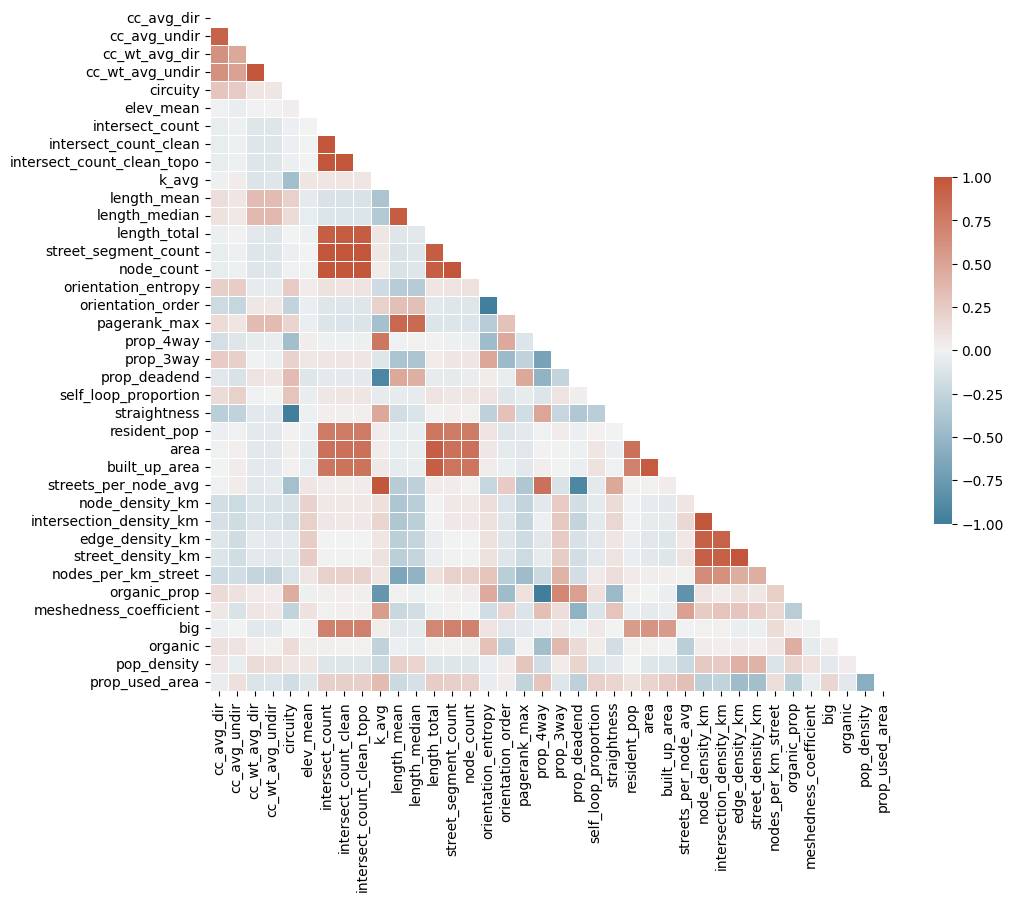

In [23]:
plot_corr(final_df, to_drop)

<h3>Correlações já esperadas</h3>

- **Coeficientes de clustering**: As variáveis de coeficiente de clustering (as que começam com *cc*), que indicam quanto os vizinhos de um nó/intersecção estão conectados entre si, possuem alta correlação umas com as outras. Entretanto, elas não possuem correlação com variáveis de densidade de intersecção ou nós. Isso indica que, apesar de existirem cidades mais densas, com intersecções mais próximas umas das outras, essas intersecções não estão, necessariamente, conectadas umas às outras. 

- **Circuito**: A variável que indica quão parecido com uma linha reta é o caminho entre dois nós (*circuity*) possui alta correlação negativa com a sua inversa *straightness*.

- **Contagem de intersecções**: As variáveis de contagem de intersercções (as que começam com *intersect_count*) possuem alta correlação umas com as outras. Além disso, também possuem alta correlação com: contagem de nós (*node_count*), já que nós são intersecções mais aqueles que representam ruas sem saída; contagem de segmentos de ruas (*street_segment_count*), já que, para cada intersecção, existe, pelo menos, duas arestas representando dois segmentos de ruas; comprimento total das ruas (*length_total*), já que, com mais segmentos de ruas, tem-se maior comprimento total da malha de ruas; população residente (*resident_pop*), já que mais intersecções representam mais ruas e, consequentemente, cidades maiores que abrigam mais pessoas; área (*area*) e área total construída (*build_up_area*), já que, com mais área construída, o que precisa de mais área total para a cidade, é possível ter mais construções que necessitam de ruas aumentando, consequentemente, a quantidade de intersecções; cidade grande (*big*), já que, foram consideradas cidades grandes aquelas com mais de 20 mil nós

- **grau médio**: A variável indicando o grau médio dos nós (*k_avg*) possui alta correlação positiva com: quantidade de ruas média por nó (*streets_per_node_avg*), já que, quanto maior a média de ruas por nó, maior a média do grau; proporção de intersecções de 4 vias (*prop_4way*), já que, quanto maior essa proporção, mais nós se conectam a 4 outros nós, o que aumenta o grau médio. Além disso, possui alta correlação negativa com: proporção orgânica (*organic_prop*), já que, quanto maior esse valor, mais os nós tendem a ter conexões com 1 ou 3 outros nós, o que diminui o grau médio; proporção de ruas sem saída (*prop_deadend*), já que, quanto mais ruas sem saída, significa que os nós se conectam a apenas um outro nó, diminuindo o grau médio;

- **Comprimento total**: A variável indicando o comprimento total das ruas da rede (*length_total*), possui alta correlação com: área (*area*) e área total construída (*build_up_area*), já que, quanto maior a área disponível e construída, mais ruas são necessárias; população residente (*resident_pop*), já que, quanto mais pessoas, mais ruas são necessárias para as construções que devem abrigá-las;

- **Contagem de segmentos de ruas** e **quantidade de nós**: A variável indicando a quantidade de segmentos de ruas ou arestas (*street_segment_count*) e a que indica a quantidade total de nós (*node_count*) possuem as mesmas correlações que a variável *length_total* e por motivos semelhantes.

- **Proporção de intersecções de 4 vias**: Essa variável (*prop_4way*) possui alta correlação relativa com proporção orgânica (*organic_prop*), já que, quanto mais intersecções entre 4 vias, menos existem entre 3 vias e ruas sem saída, o que diminui a proporção orgânica. Além disso, possui alta correlação positiva com a quantidade de ruas média por nó (*streets_per_node_avg*), já que, sendo uma variável *proxy* para o grau médio dos nós, quanto maior for o seu valor, maior será o *prop_4way*.

- **Proporção de ruas sem saída**: Essa variável (*prop_deadend*) possui alta correlação negativa com quantidade de segmentos de ruas médio por nó (*street_per_node_avg*) já que, quanto mais ruas sem saída, menor é o grau dos nós, na qual *street_per_node_avg* é uma *proxy*.

- **Variáveis de densidade**: Essas variáveis (terminadas em *density_km*) possuem alta correlação positiva entre elas mesmas já que, quanto mais ruas em uma área, maior a quantidade de intersecções também.

- **Proporção da área usada**: Essa variável mede quanto da área total disponível para a cidade já foi usada. Ela possui uma correlação negativa com a densidade populacional, indicando que quanto mais área é utilizada, menor a densidade populacional e vice-versa.

<h3>Correlações inesperadas</h3>

- **Proporção orgânica**: Essa variável (*organic_prop*) não possui correlação com a densidade de nós/intersecções (*node_density_km* e *intersection_density_km*), o que indica que tanto cidades mais densas quanto mais espalhadas podem ser mais orgânicas ou não. Essa variável também não apresenta correlação com a quantidade de nós (*node_count*), o que indica que não existe uma regra com relação ao tamanho de uma cidade e o seu planejamento retratado pela proporção orgânica. O mesmo vale com as variáveis de área e população residente.

- **Coeficiente de clustering**: Essa variável (as que começam com *cc*) indica quanto os vizinhos de um nó/intersecção estão conectados entre si. Entretanto, ela não possui correlação com as variáveis *prop_deadend*, *prop_3way* e *prop_4way*. Isso indica que, apesar de existirem cidades com diferentes proporções desses tipos de intersecções, o coeficiente de clustering não segue uma regra clara.

- **Máximo valor de pagerank**: Essa variável possui alta correlação positiva com variáveis indicando comprimento médio e total das ruas. Não está claro o porquê disso.

- **Quantidade de intersecções**: Essa variável não possui correlação com variáveis de densidade de intersecção, nós ou arestas. Isso indica que a densidade tem pouca influência na quantidade de intersecções, sendo mais afetado pela área total da cidade.

- **Densidade populacional**: Essa variável não possui correlação com a quantidade de intersecções, comprimento total das ruas da rede e nenhuma outra variável.

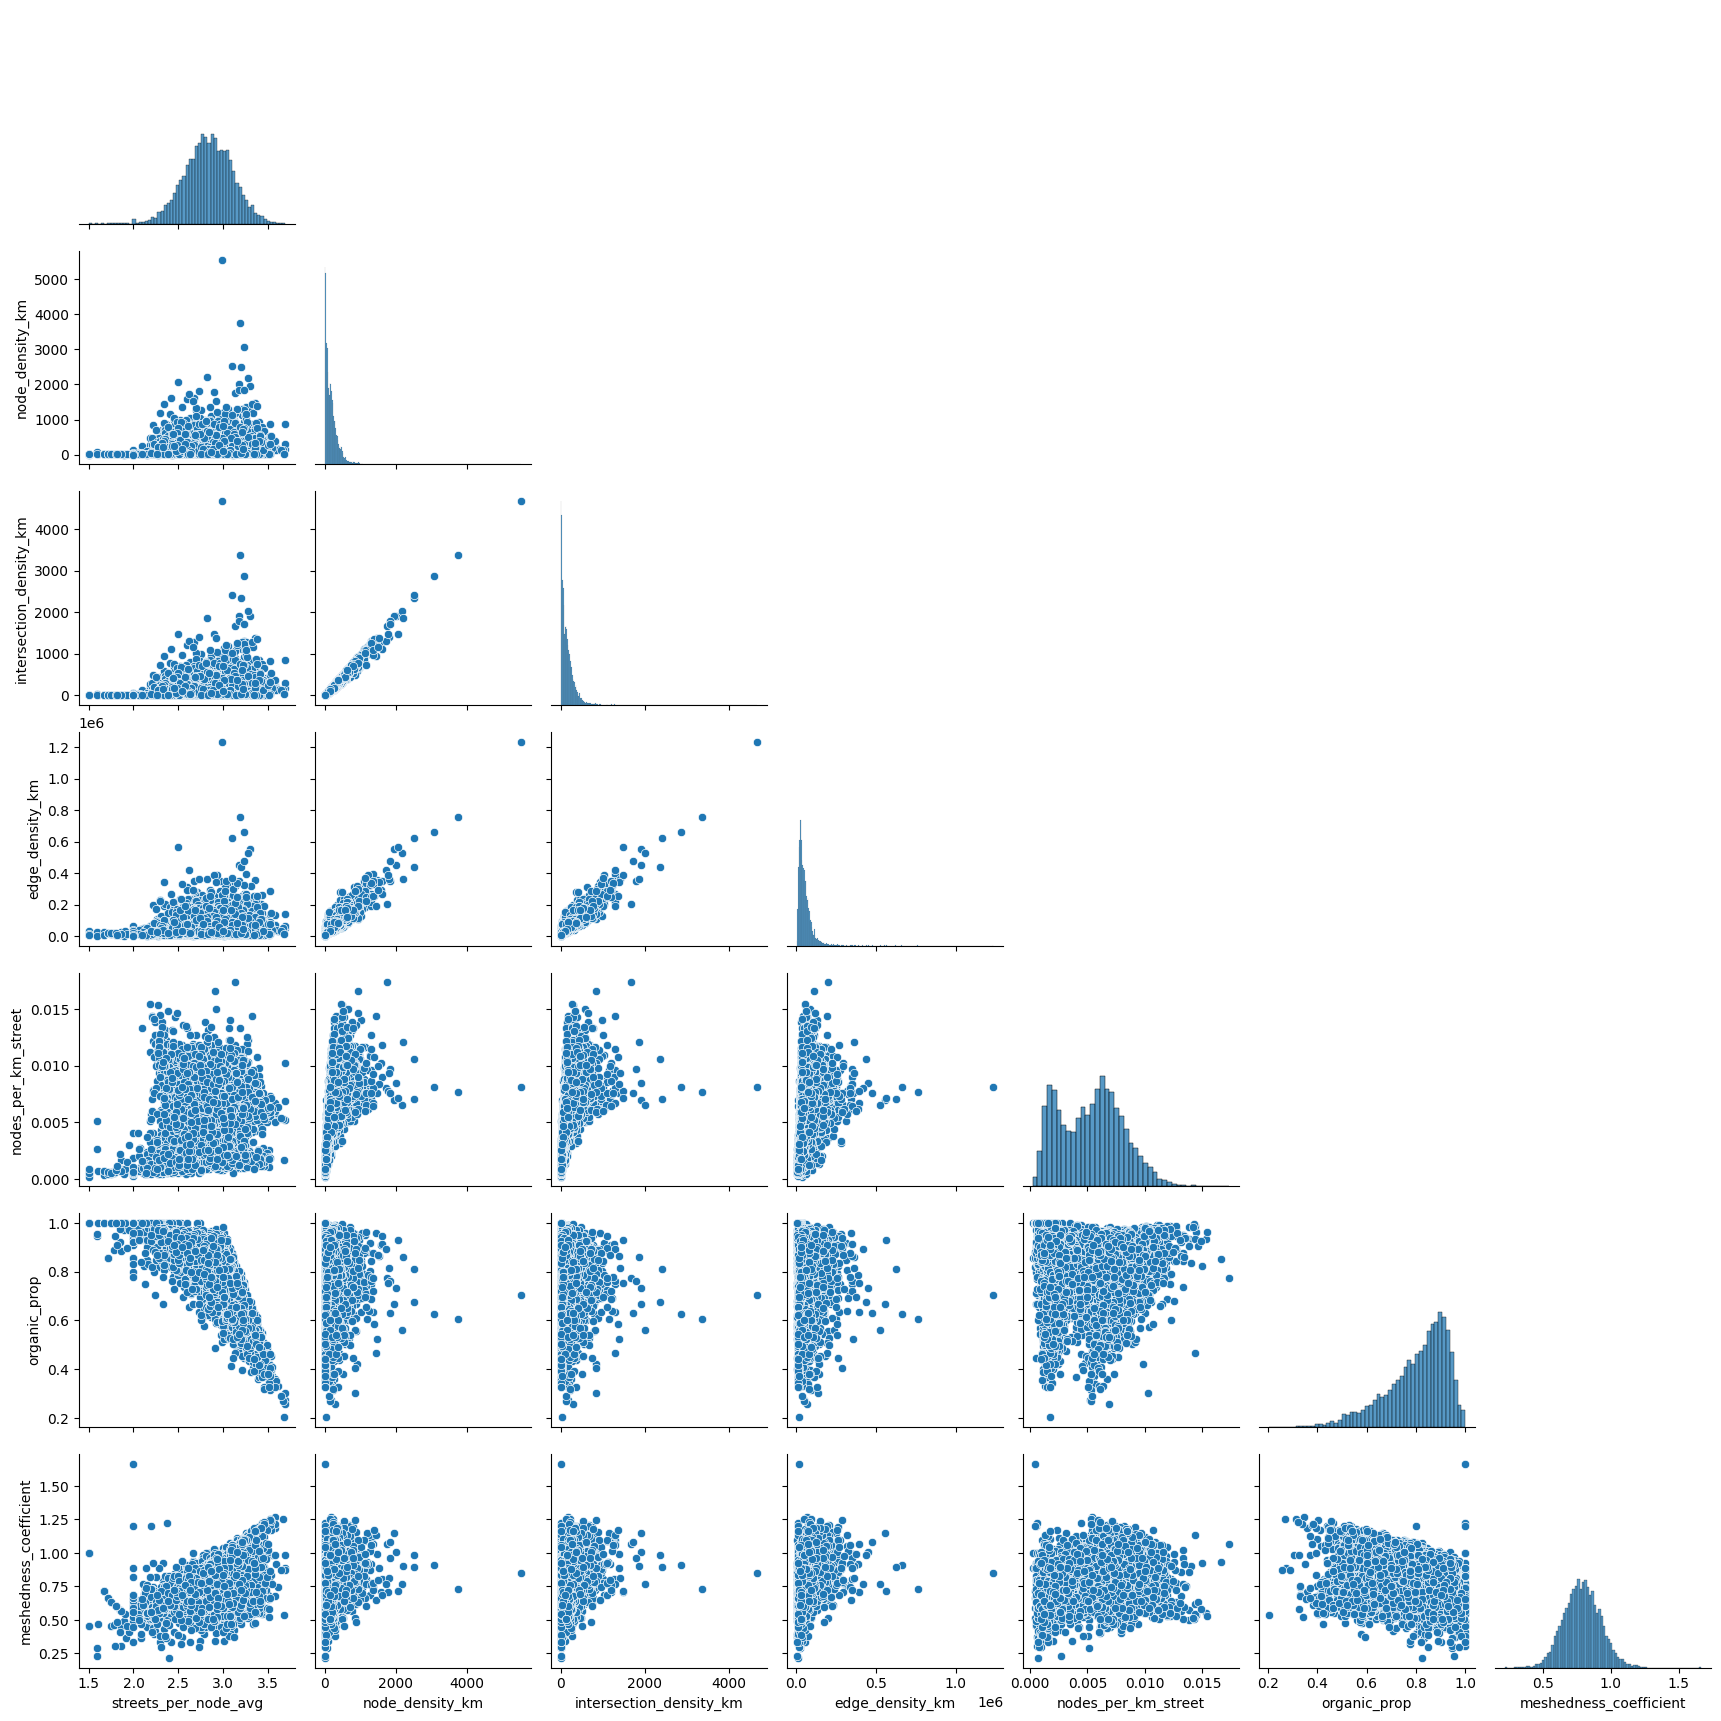

In [24]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
              'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient']
sns.pairplot(final_df[target_cols], corner=True)

Por variável:

- **streets_per_node_avg**: Essa variável possui uma distribuição normal. Ela possui uma boa correlação negativa com **organic_prop**, o que também faz sentido já que quanto maior o grau médio dos nós, mais indica que as ruas seguem um grid, o que diminui o **organic_prop**. Também possui uma certa correlação positiva com o **meshedness_coefficient**.
- **node_density_km**: Possui uma correlação positiva quase perfeita com **intersection_density_km**, o que é de se esperar e com **edge_density_km**. Lembrando que **intersection_density_km** não leva em consideração ruas sem saída, enquanto **edge_density_km** leva.
- **intersection_density_km**: Possui uma correlação positiva quase perfeita com **edge_density_km**, o que já era de se esperar.
- **edge_density_km**: Não possui uma correlação com as outras variáveis que sobraram. A sua relação com **organic_prop** indica que a maioria das cidades não possui uma alta densidade de arestas e isso não influencia na proporção orgânica. Isso poderia ser óbvio já que na conta de **organic_prop** não é levado em consideração nenhuma densidade.
- **nodes_per_km_street**: Parece haver uma subdivisão em dois grupos de cidades com relação ao **organic_prop**
- **organic_prop**: Parece haver uma leve correlação negativa com o **meshedness_coefficient**, entretanto, existe muita variação.

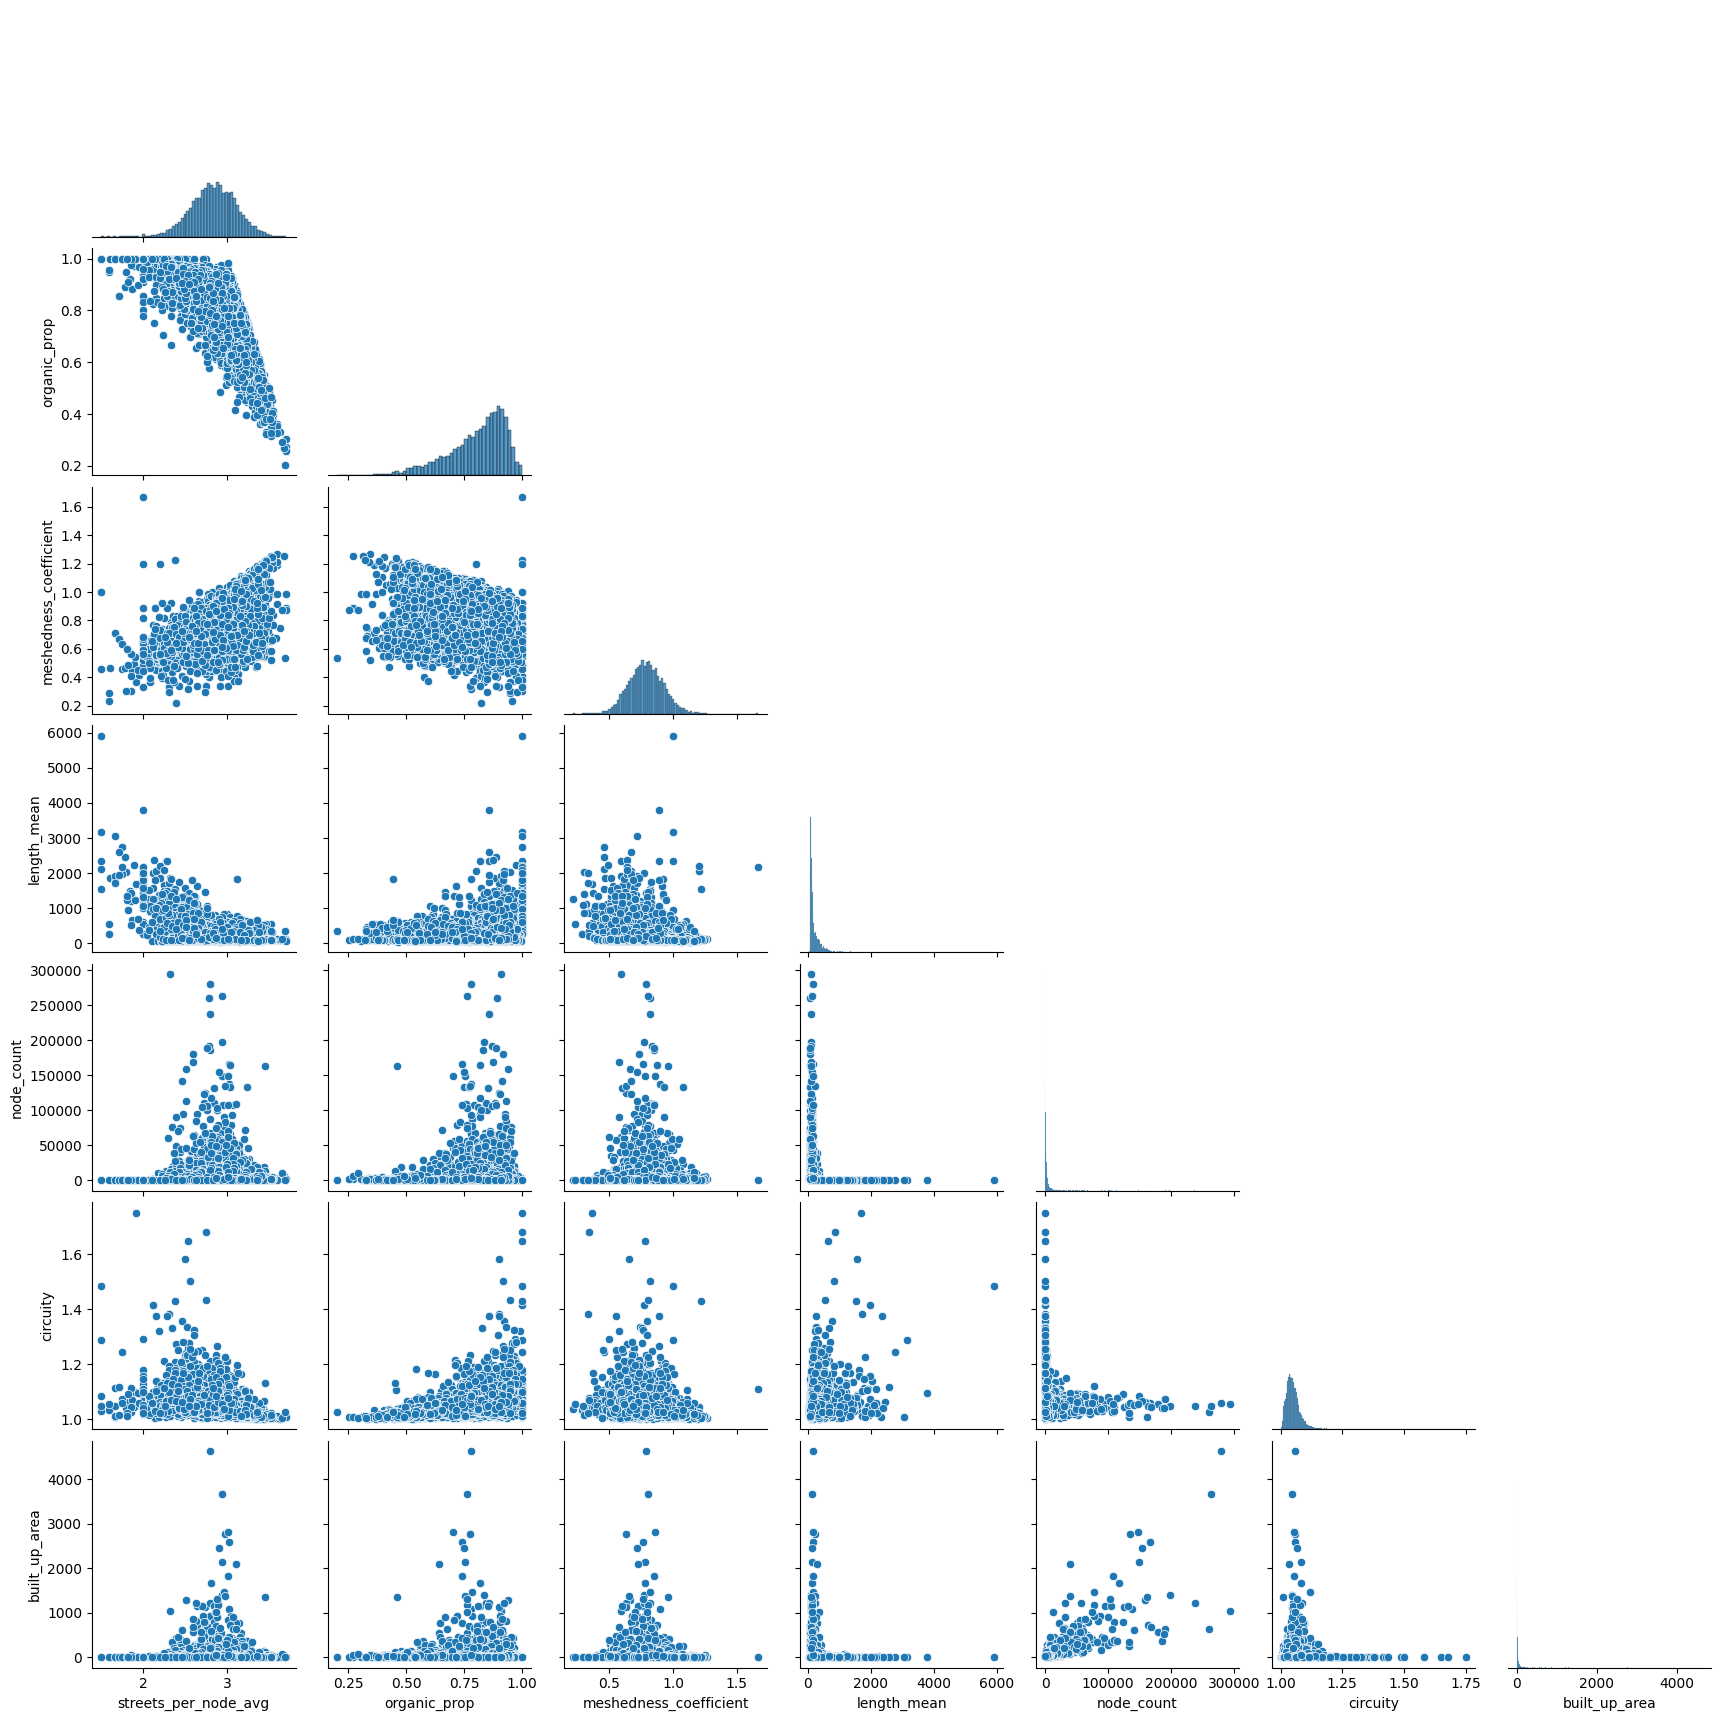

In [25]:
target_cols = ['streets_per_node_avg', 'organic_prop', 'meshedness_coefficient',
              'length_mean', 'node_count', 'circuity', 'built_up_area']
sns.pairplot(final_df[target_cols], corner=True)

## Sobre *organic_prop* e *organic*

Text(0.5, 1.0, 'organic_prop dist')

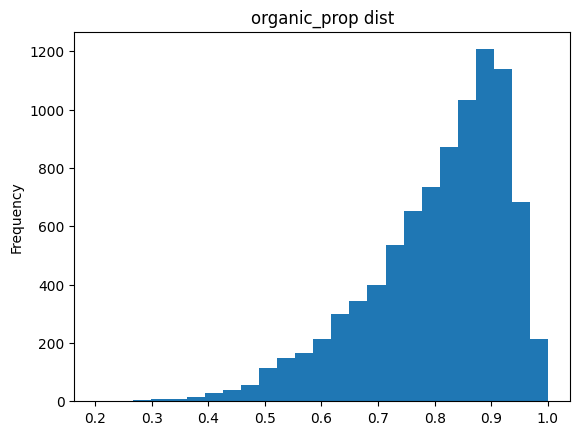

In [26]:
final_df['organic_prop'].plot(kind='hist', bins=25)
plt.title('organic_prop dist')

Existem cidades com proporção orgânica perfeita igual a 1. Isso significa que pode-se esperar que essas cidades possuam somente ruas sem saída ou intersecções em T (cruzamento entre 3 ruas). Isso serve para indicar que essas cidades não sãp planejadas.

In [27]:
full_organic_cities = final_df[final_df['organic_prop'] == 1]

In [28]:
full_organic_cities[40:][['core_city','uc_id', 'country']]

core_city  uc_id                           country
4265          tanda   7309                             india
4431          ahore   6607                             india
4447        korutla   8038                             india
4676        akabuka   2470                           nigeria
4901     laxmangarh   6721                             india
4913         ojaima   2490                           nigeria
5254        nilanga   7650                             india
5259       partapur   6849                             india
5631      bholarhat   9577                        bangladesh
5793          gumia   9226                             india
5804          banda   7705                             india
5859        unnamed   9188                             india
5910        unnamed   9658                             india
5912       palacode   8259                             india
5989        sherkot   7208                             india
6617        unnamed   7683                             india
6651        unnamed  11450                             china
6858       karimpur   9697                             india
7001       mithapur   6369                             india
7092       shajapur   7241                             india
7224     chutmalpur   7001                             india
7345         mawana   7110                             india
7518      phyongsan  12297                       north_korea
7542          balod   8484                             india
7574         digboi  10099                             india
7749   bethuadahari   9687                             india
7792          chafe   2496                           nigeria
8030       kikondja   3695  democratic_republic_of_the_congo
8214        barwaha   7271                             india
8442  ganj_dundwara   7422                             india
8499         sonari  10087                             india
8515        seohara   7219                             india
8862  gongchangling  11475                             china

Por outro lado, existem algumas cidades com baixa proporção orgânica.

In [29]:
low_organic_cities = final_df[final_df['organic'] == False]

In [30]:
len(low_organic_cities)

184

Text(0.5, 1.0, 'Non organic cities per world region')

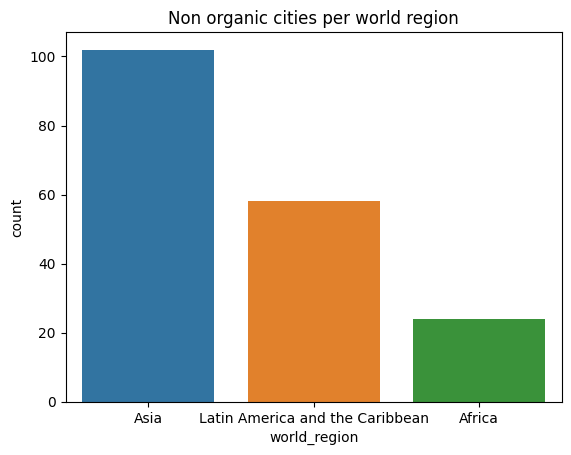

In [31]:
g = sns.countplot(x=final_df[final_df['organic'] == False]["world_region"])
g.set_title("Non organic cities per world region")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Eastern Asia'),
  Text(1, 0, 'South America'),
  Text(2, 0, 'Central America'),
  Text(3, 0, 'Northern Africa'),
  Text(4, 0, 'Western Africa'),
  Text(5, 0, 'Eastern Africa'),
  Text(6, 0, 'Middle Africa'),
  Text(7, 0, 'South-Central Asia'),
  Text(8, 0, 'Western Asia')])

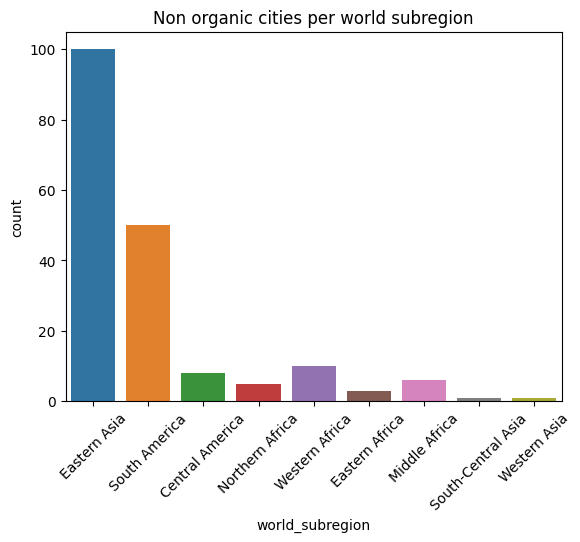

In [32]:
g = sns.countplot(x=final_df[final_df['organic'] == False]["world_subregion"], )
g.set_title("Non organic cities per world subregion")
plt.xticks(rotation=45)

Nenhuma cidade norte americana, europeia e da oceania são consideradas não orgânicas.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

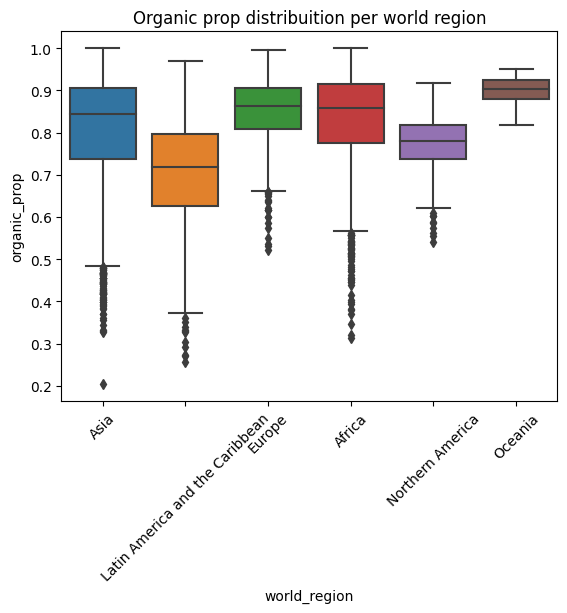

In [33]:
g = sns.boxplot(final_df,x='world_region', y='organic_prop')
g.set_title("Organic prop distribuition per world region")
plt.xticks(rotation=45)

# Sobre densidade de intersecções

In [34]:
final_df.query('intersection_density_km > 2000')[['core_city', 'intersection_density_km', 'country']]

core_city  intersection_density_km   country
512                                riobamba              3370.725111   ecuador
2350                               djibouti              2353.416899  djibouti
3307                               huancayo              2866.499267      peru
3976                                 ibarra              2017.723683   ecuador
4041                            al_mansurah              2413.536322     yemen
7968  canton_santo_domingo_de_los_tsachilas              4680.600181   ecuador

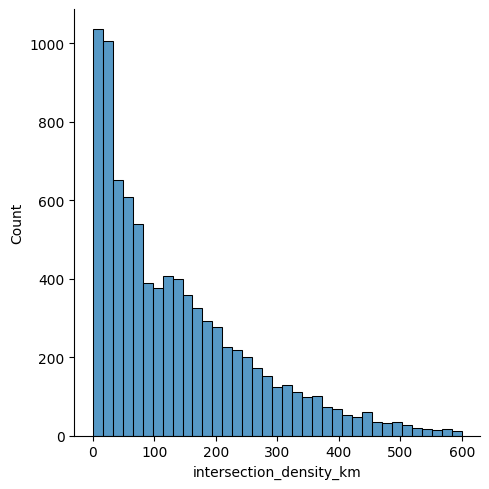

In [35]:
sns.displot(final_df.query('intersection_density_km < 600'), x='intersection_density_km')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

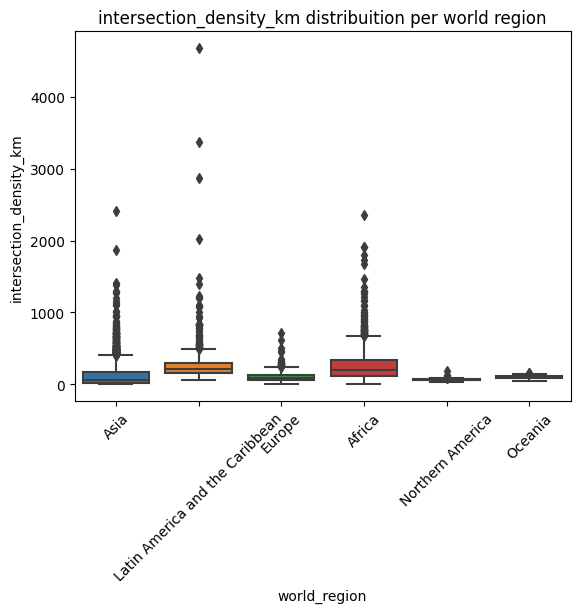

In [36]:
g = sns.boxplot(final_df, x='world_region', y='intersection_density_km')
g.set_title("intersection_density_km distribuition per world region")
plt.xticks(rotation=45)

In [37]:
best_inter_density = final_df[final_df['intersection_density_km'].between(80, 100)]

In [38]:
len(best_inter_density)

478

In [39]:
best_inter_density.query('organic == False')['intersection_density_km']

3247    88.466417
Name: intersection_density_km, dtype: float64

In [40]:
organic_best_inter_density = best_inter_density.query('organic == True')

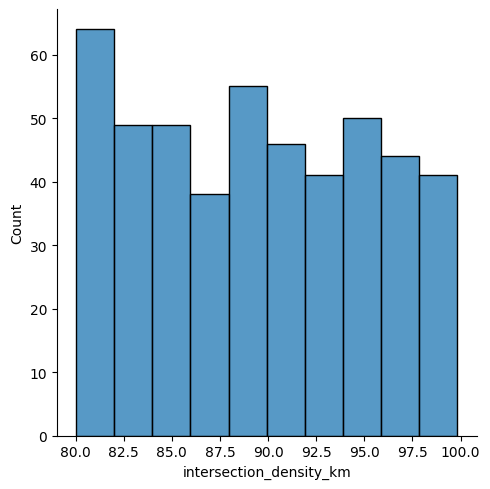

In [41]:
sns.displot(organic_best_inter_density, x='intersection_density_km')

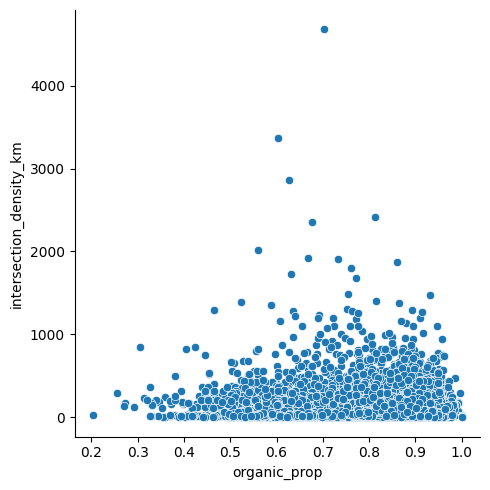

In [42]:
sns.relplot(data=final_df, x='organic_prop', y='intersection_density_km')

## Sobre Densidade Populacional

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Latin America and the Caribbean'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Northern America'),
  Text(5, 0, 'Oceania')])

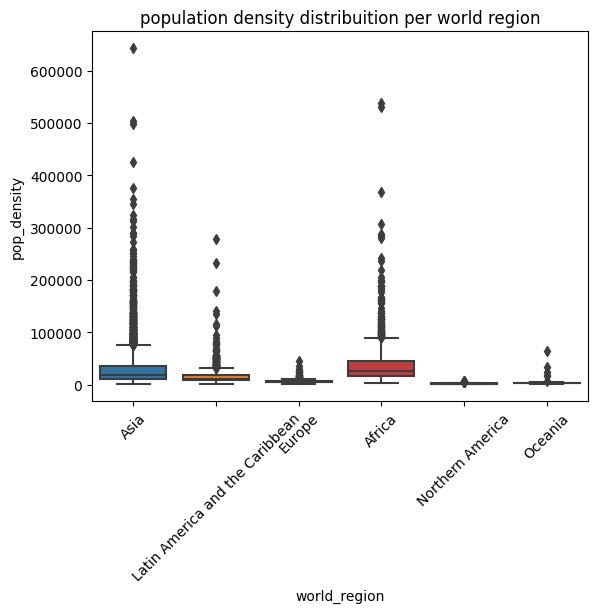

In [43]:
g = sns.boxplot(final_df, x='world_region', y='pop_density')
g.set_title("population density distribuition per world region")
plt.xticks(rotation=45)

In [44]:
final_df.columns

Index(['country', 'country_iso', 'core_city', 'uc_id', 'cc_avg_dir',
       'cc_avg_undir', 'cc_wt_avg_dir', 'cc_wt_avg_undir', 'circuity',
       'elev_iqr', 'elev_mean', 'elev_median', 'elev_range', 'elev_std',
       'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'orientation_order',
       'pagerank_max', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'uc_names', 'world_region',
       'world_subregion', 'resident_pop', 'area', 'built_up_area', 'city_name',
       'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', '2way_int_prop',
       'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'big',
       'organic', 'pop_density', 'prop_used_area'],
      dtype='object')

In [45]:
target_num_cols = [
      'circuity', 'elev_mean', 'grade_mean', 'intersect_count', 
        'k_avg', 'length_mean', 'node_count', 'pagerank_max',
        'prop_4way', 'prop_3way', 'prop_deadend', 'self_loop_proportion',
        'straightness', 'resident_pop', 'area', 'built_up_area', 
        'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
        'edge_density_km', 'street_density_km', 'nodes_per_km_street', 'organic_prop',
        'meshedness_coefficient'
    
]

target_cat_cols = [
    'world_region', 'world_subregion',
]

In [46]:
len(target_num_cols)

24

In [47]:
num_cols_groups = []
group_max_size = 6
for i in range(1,4):
    num_cols_groups.append(target_num_cols[(i-1)*group_max_size:i*group_max_size])

In [48]:
num_cols_groups

[['circuity',
  'elev_mean',
  'grade_mean',
  'intersect_count',
  'k_avg',
  'length_mean'],
 ['node_count',
  'pagerank_max',
  'prop_4way',
  'prop_3way',
  'prop_deadend',
  'self_loop_proportion'],
 ['straightness',
  'resident_pop',
  'area',
  'built_up_area',
  'streets_per_node_avg',
  'node_density_km']]

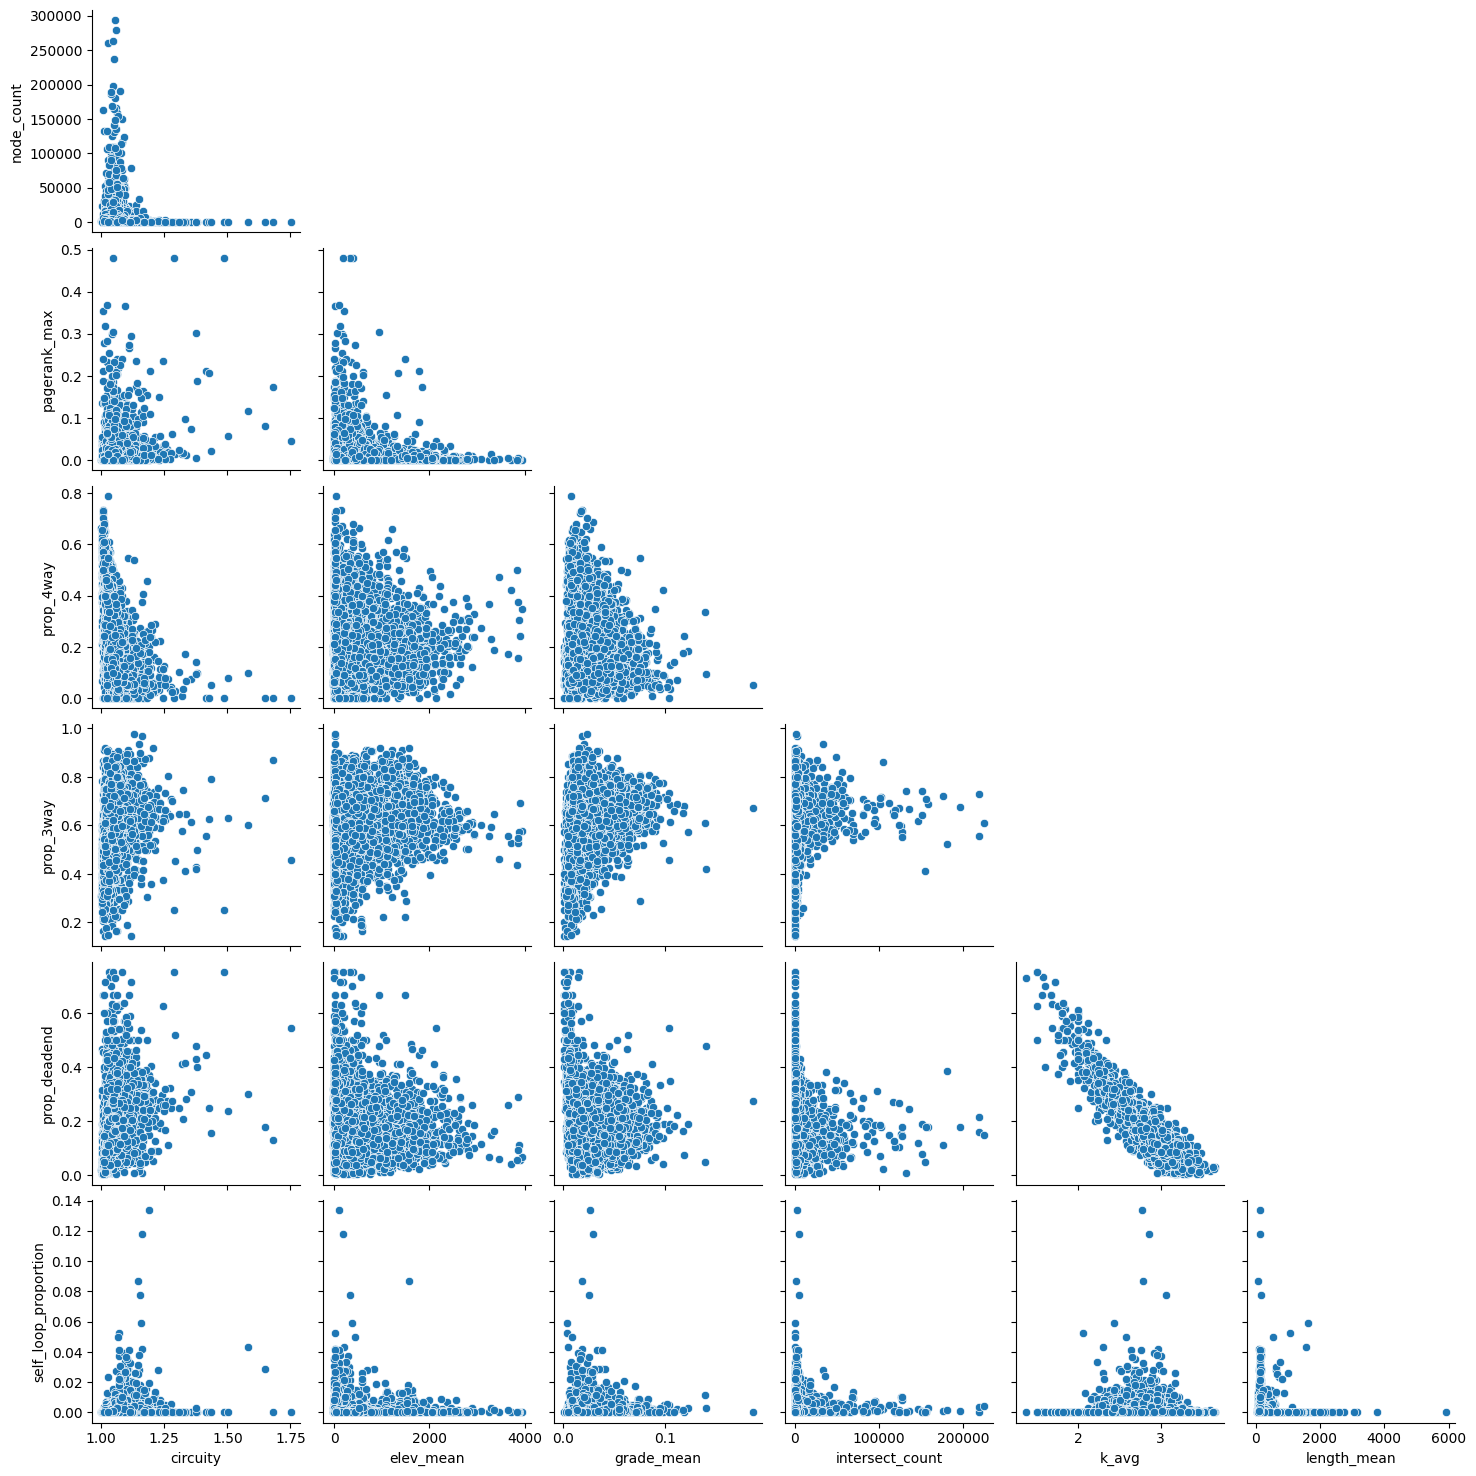

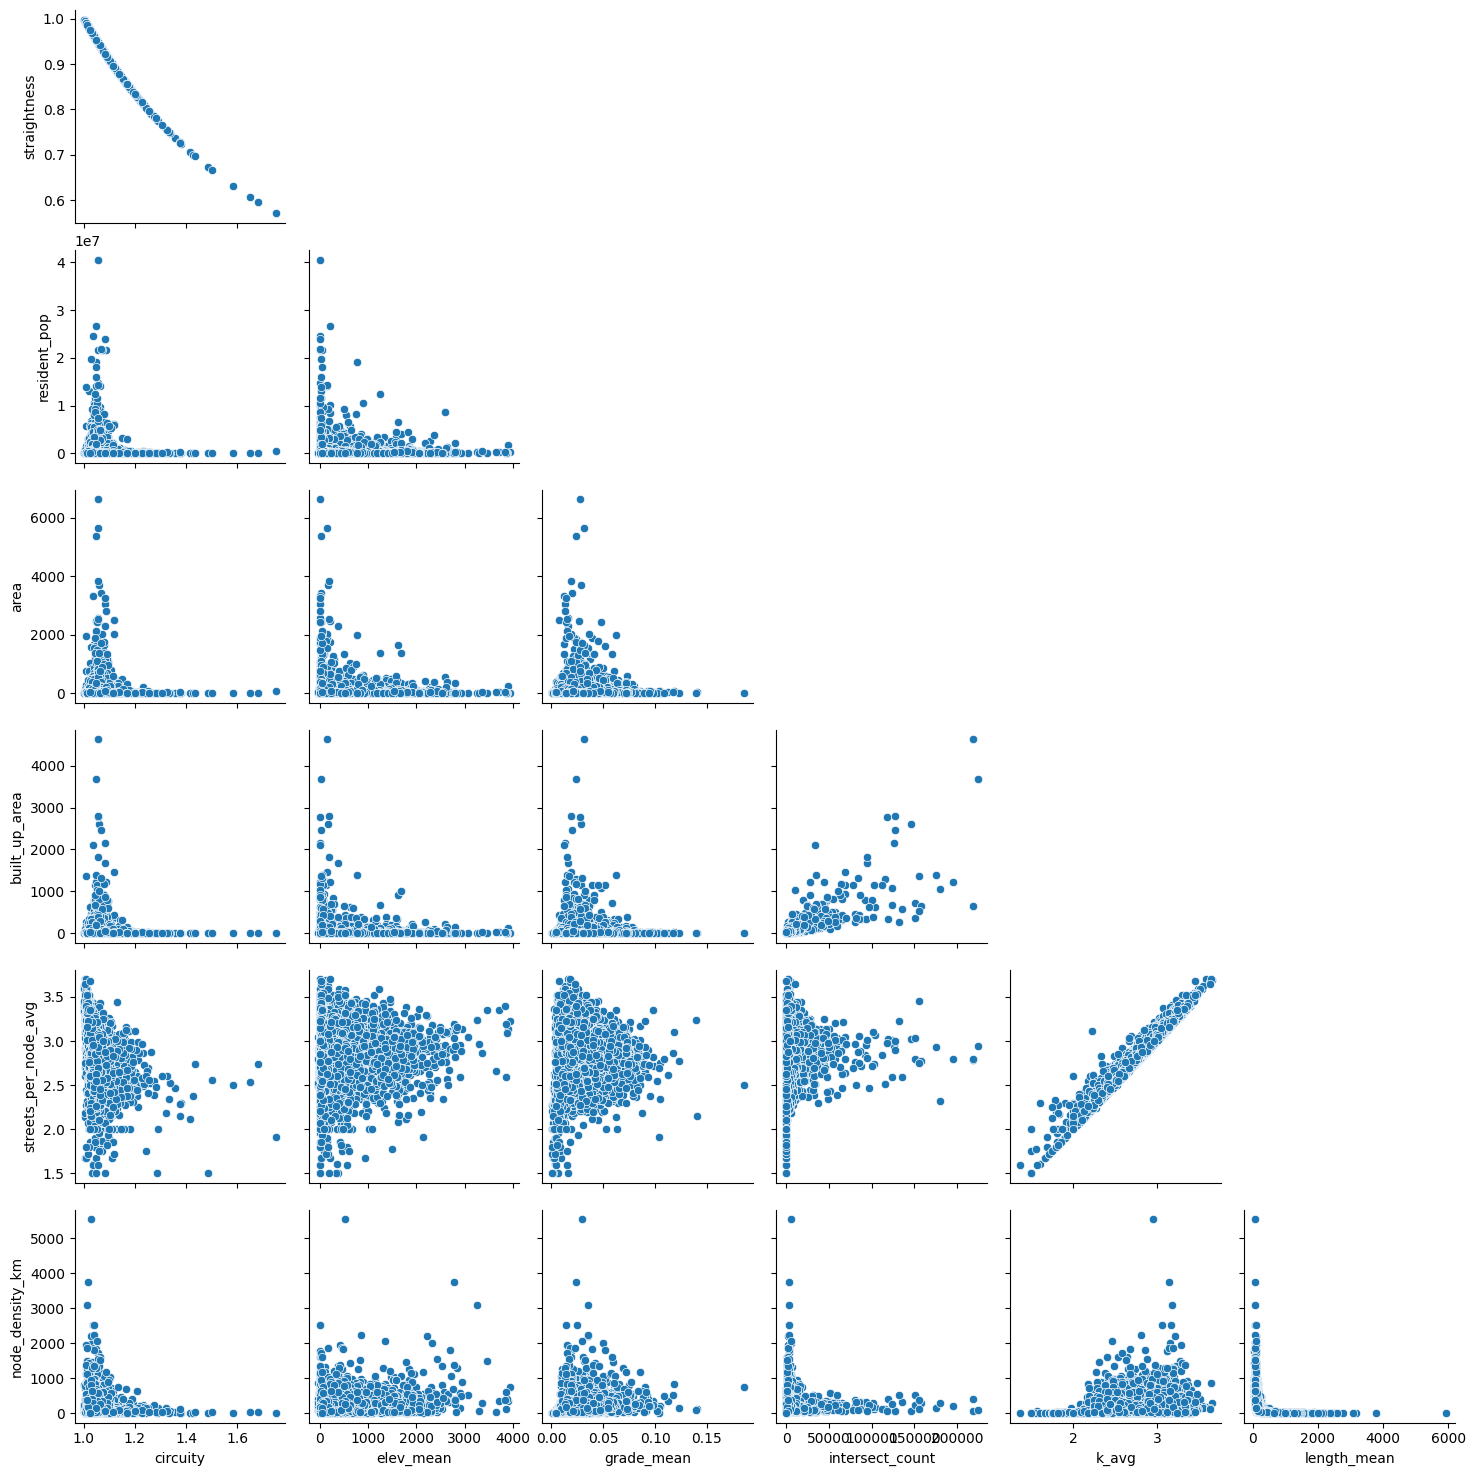

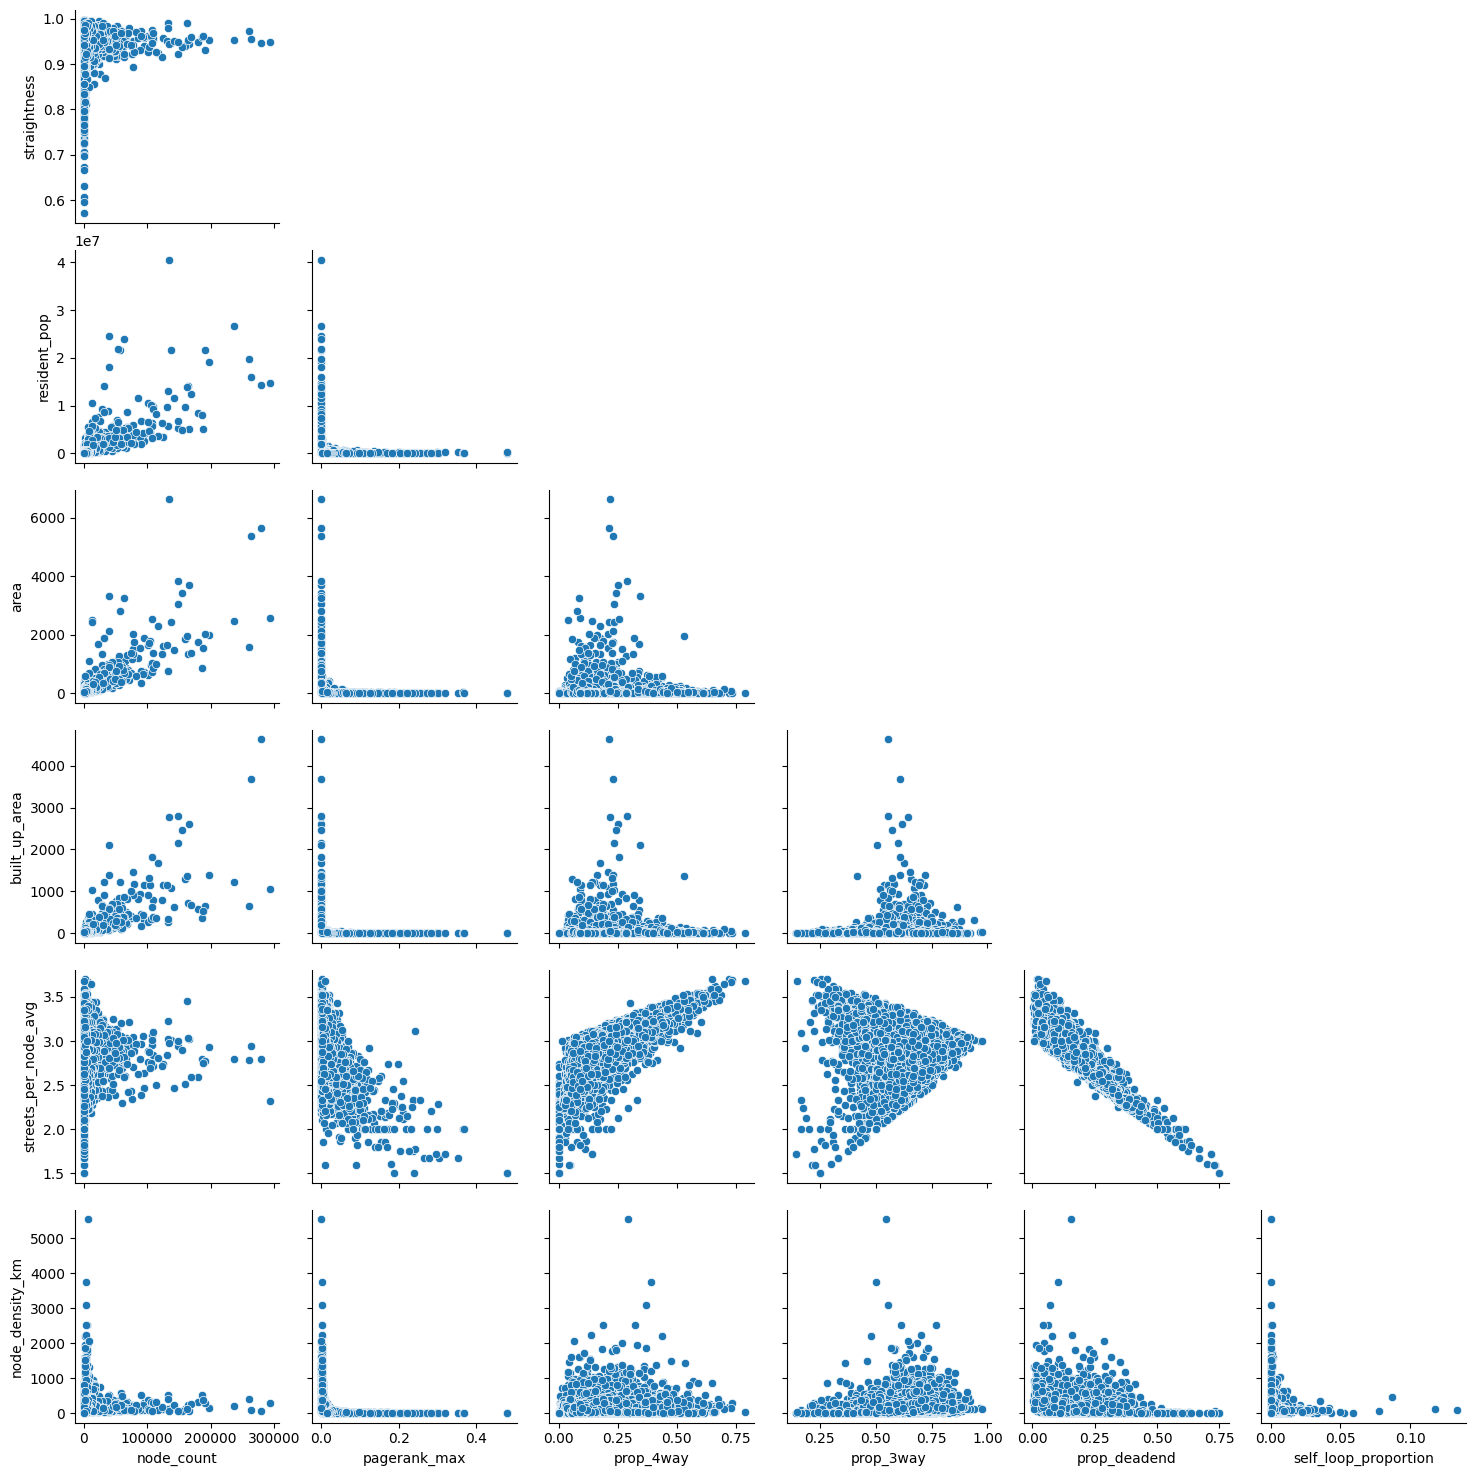

In [49]:
for subset in list(itertools.combinations(range(len(num_cols_groups)), 2)):
        first_group = num_cols_groups[subset[0]]
        second_group = num_cols_groups[subset[1]]
        
        sns.pairplot(final_df, x_vars=first_group, y_vars=second_group, corner=True)

In [50]:
def plot_all_against_num(target, num_cols, cat_cols, data, hue):
    num_cols_copy = num_cols.copy()
    if target in num_cols_copy:
        num_cols_copy.remove(target)
    for col in num_cols_copy:
        sns_plot = sns.relplot(data=data, x=target, y=col, hue=hue)
        # fig = plt.gcf()
        # plt.close(fig)
    
    for col in cat_cols:
        sns_plot = sns.catplot(data=data, x=col, y=target, hue=hue, kind="violin", inner="stick", split=True, palette="pastel")
        # fig = plt.gcf()
        # plt.close(fig)

### Distribuição de variáveis entre as orgânicas e não orgânicas

Definindo cidades como orgânicas ou não

Text(0.5, 1.0, 'Non-organic cities per subregion of the world')

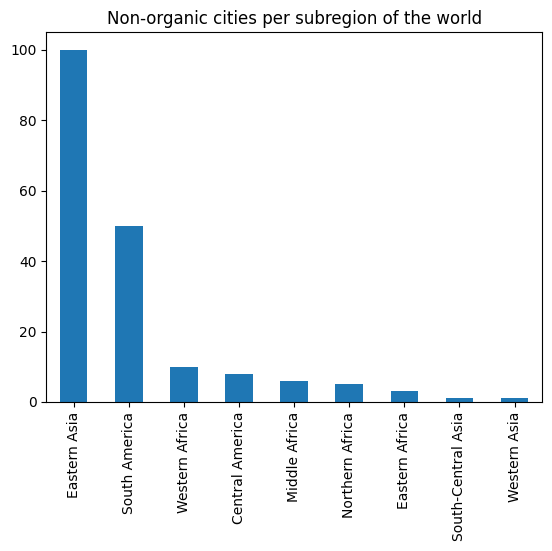

In [51]:
final_df[final_df['organic'] == False]['world_subregion'].value_counts().plot(kind='bar')
plt.title("Non-organic cities per subregion of the world")

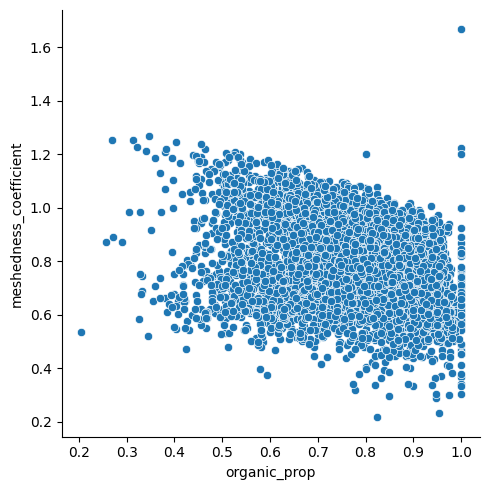

In [52]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient')

In [126]:
def type_one_city(row):
    low_med_organic = row['organic_prop'] < 0.6
    good_mesh = row['meshedness_coefficient'] >= 0.9
    return low_med_organic and good_mesh

final_df['type_one_city'] = final_df.apply(type_one_city, axis=1)

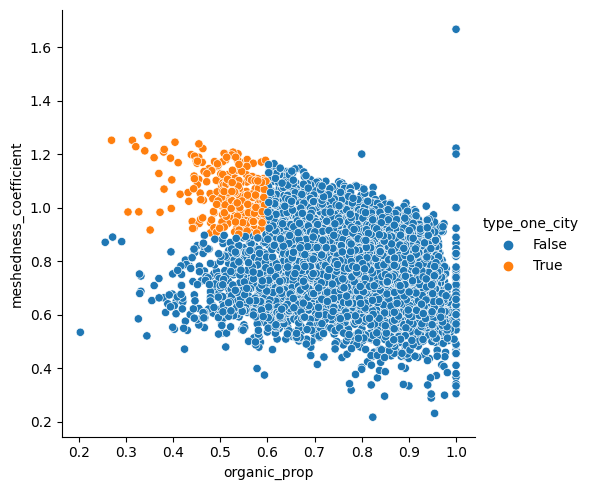

In [131]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient', hue='type_one_city')

In [133]:
filtered_data = final_df[final_df['length_mean'] < 2000]
filtered_data = filtered_data[filtered_data['intersection_density_km'] < 2000]

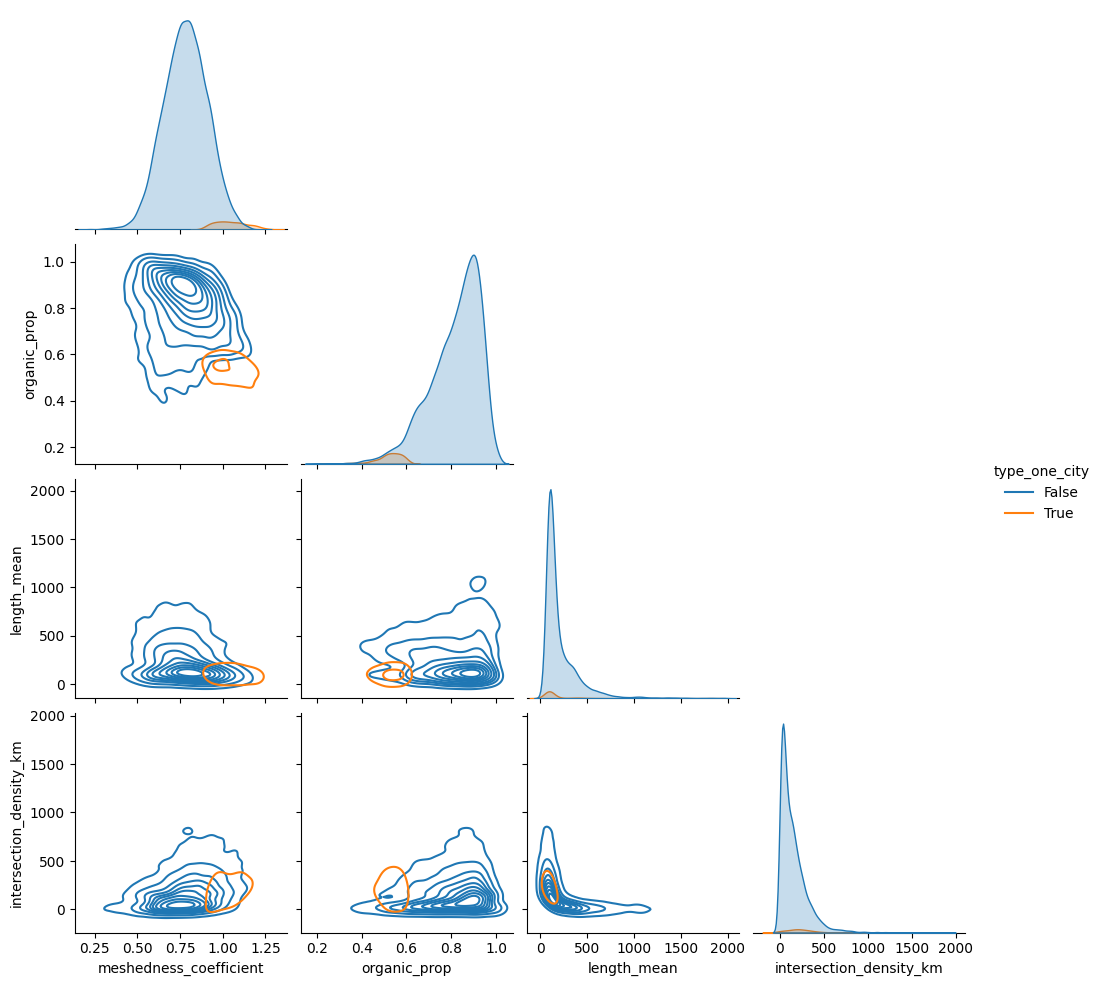

In [135]:
sns.pairplot(filtered_data[['type_one_city', 'meshedness_coefficient', 'organic_prop','length_mean','intersection_density_km']], hue='type_one_city', corner=True, kind='kde')

<AxesSubplot: xlabel='length_median', ylabel='Count'>

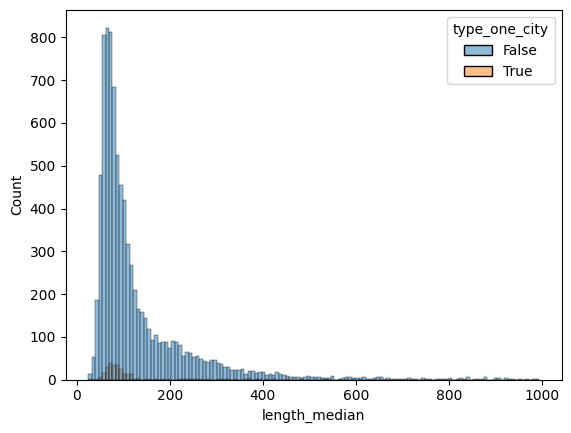

In [142]:
# length_median
sns.histplot(data=final_df[final_df['length_median'] < 1000], hue="type_one_city", x="length_median")

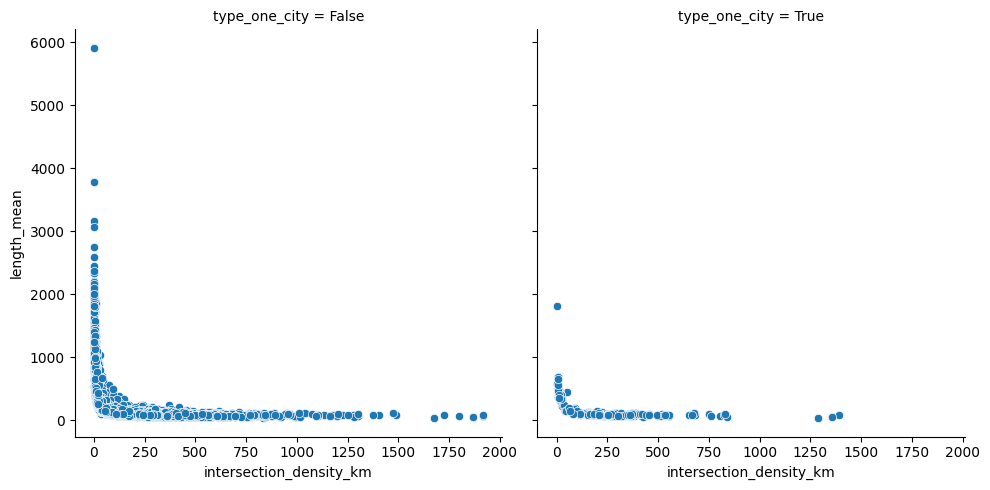

In [145]:
sns.relplot(data=final_df[final_df['intersection_density_km'] < 2000], x='intersection_density_km', y='length_mean', col='type_one_city', col_wrap=2)

<AxesSubplot: xlabel='circuity', ylabel='Count'>

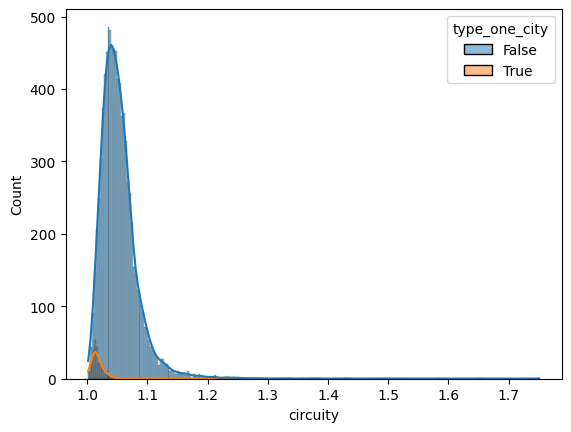

In [154]:
sns.histplot(data=final_df, x='circuity', hue='type_one_city', fill=True, kde=True)

<AxesSubplot: xlabel='circuity', ylabel='meshedness_coefficient'>

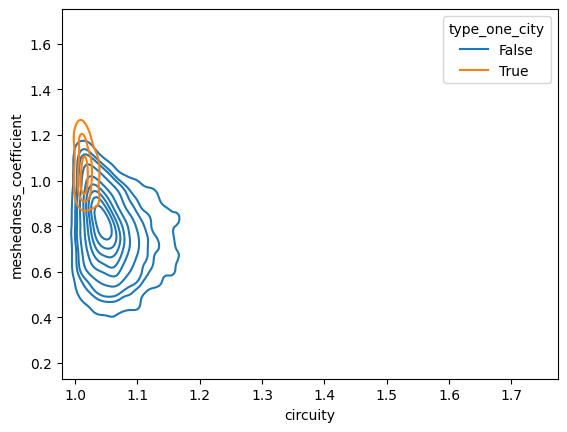

In [149]:
sns.kdeplot(data=final_df, x='circuity', y='meshedness_coefficient', hue='type_one_city')

<AxesSubplot: xlabel='circuity', ylabel='organic_prop'>

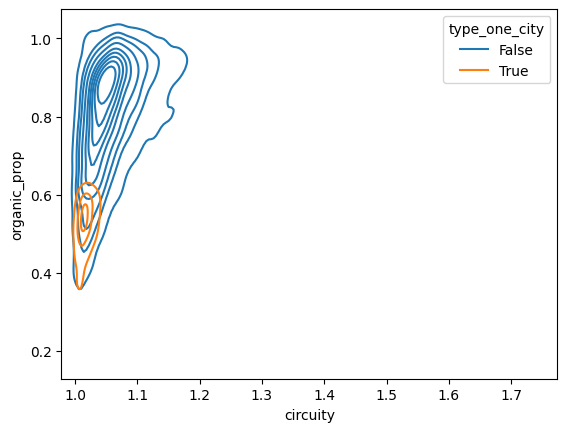

In [150]:
sns.kdeplot(data=final_df, x='circuity', y='organic_prop', hue='type_one_city')

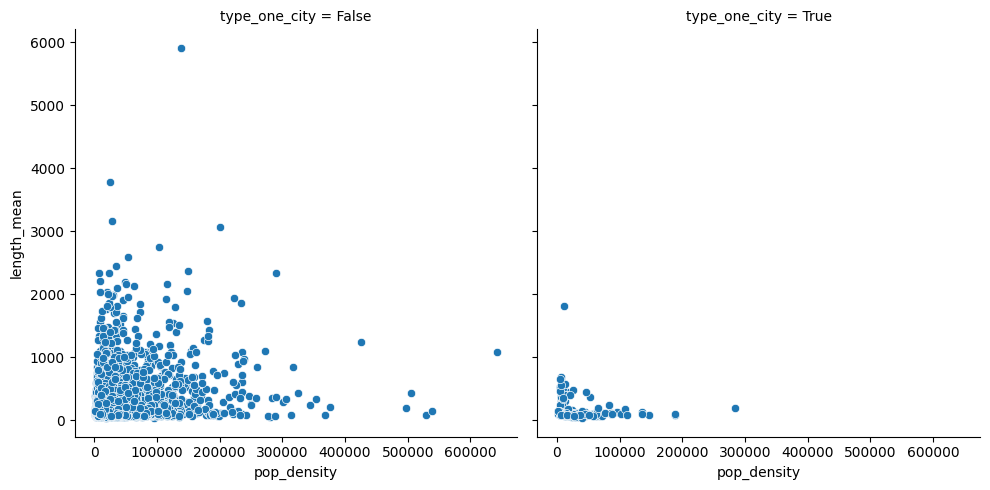

In [144]:
sns.relplot(data=final_df, x='pop_density', y='length_mean', col='type_one_city')

<AxesSubplot: xlabel='intersection_density_km', ylabel='Count'>

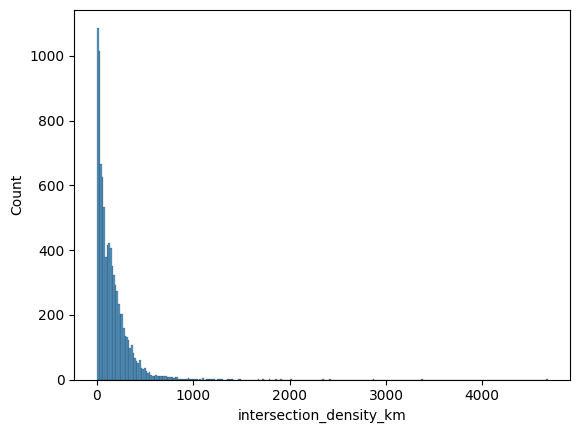

In [155]:
sns.histplot(data=final_df, x='intersection_density_km')

In [168]:
def type_two_city(row):
    low_med_organic = row['organic_prop'] < 0.65
    good_mesh = row['meshedness_coefficient'] >= 0.75
    good_intersec_density = row['intersection_density_km'] >= 80 and row['intersection_density_km'] <= 120
    not_type_one = not row['type_one_city']
    return all([low_med_organic, good_mesh, good_intersec_density, not_type_one])

final_df['type_two_city'] = final_df.apply(type_two_city, axis=1)

In [169]:
final_df[final_df['type_two_city'] == True][['country', 'core_city', 'uc_id', 'resident_pop']]

country      core_city  uc_id  resident_pop
173                         kazakhstan      zhanaozen   5649        109849
817                      united_states       richmond    828        244212
1169                           ukraine         lozova   3835         64288
1430                     united_states        spokane    241        265825
2672                         argentina       la_plata   1117        691901
3947                     united_states  atlantic_city    918         65800
4108                             china        hanggin  10179         52920
4249                           myanmar        aunglan  10162        123157
4425                           nigeria          kamba   2174         95782
4577                           myanmar    nyaung_shwe  10226         70405
5141                              cuba       camaguey    604        257504
5373                              cuba         havana    473       1839558
5950                         argentina        campana   1096         61404
5971                           nigeria      buni_yadi   2984        107644
6686  democratic_republic_of_the_congo        kabongo   3638         82140
6746                             china      qipanjing  10140         53272
8385                           uruguay     montevideo   1138       1310838

In [178]:
def city_type(row):
    
    if row['type_one_city']:
        return 1
    elif row['type_two_city']:
        return 2
    else:
        return 3
    
final_df['city_type'] = final_df.apply(city_type, axis=1)

In [181]:
final_df['city_type'].value_counts()

3    8627
1     265
2      17
Name: city_type, dtype: int64

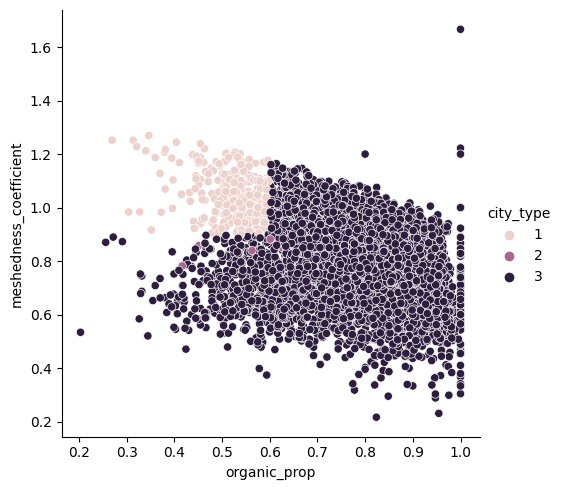

In [179]:
sns.relplot(final_df, x='organic_prop', y='meshedness_coefficient', hue='city_type')

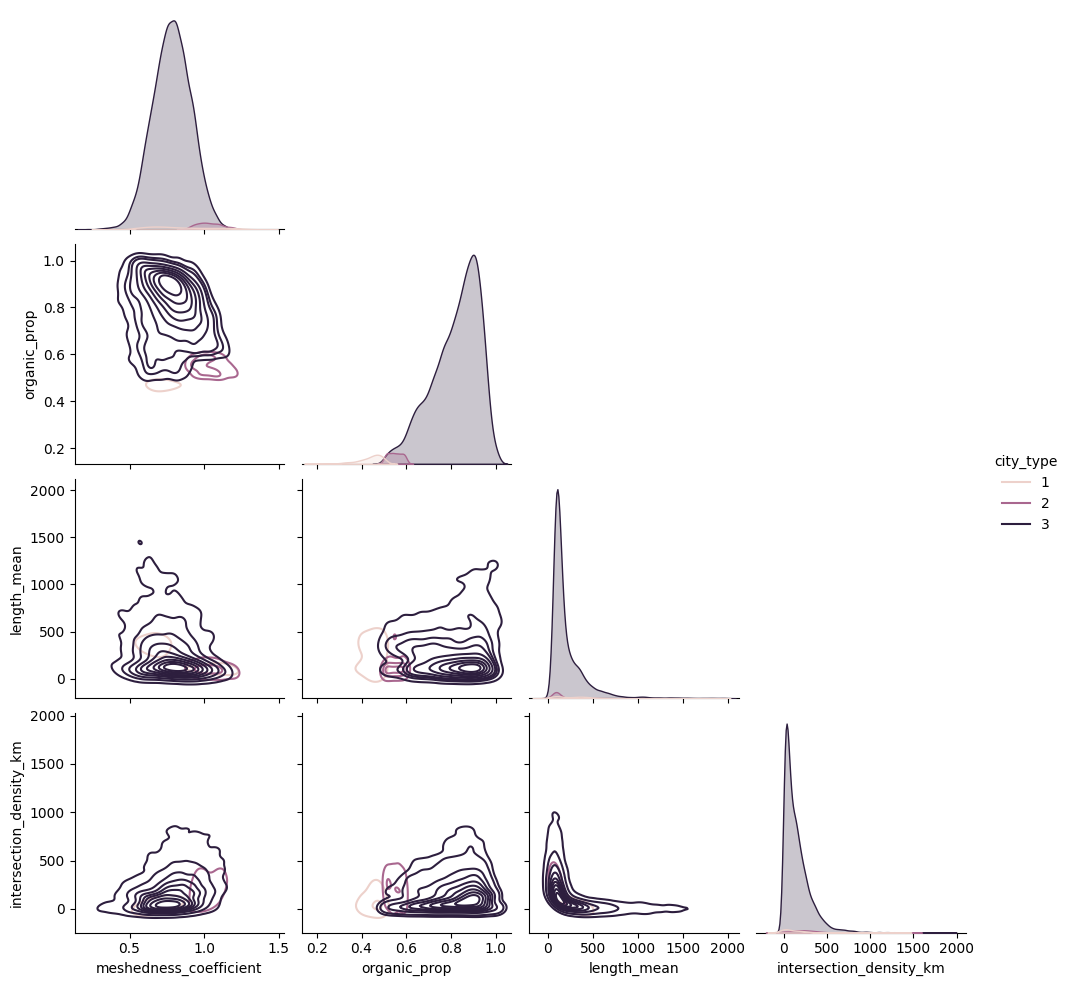

In [180]:
sns.pairplot(filtered_data[['city_type', 'meshedness_coefficient', 'organic_prop','length_mean','intersection_density_km']], hue='city_type', corner=True, kind='kde')

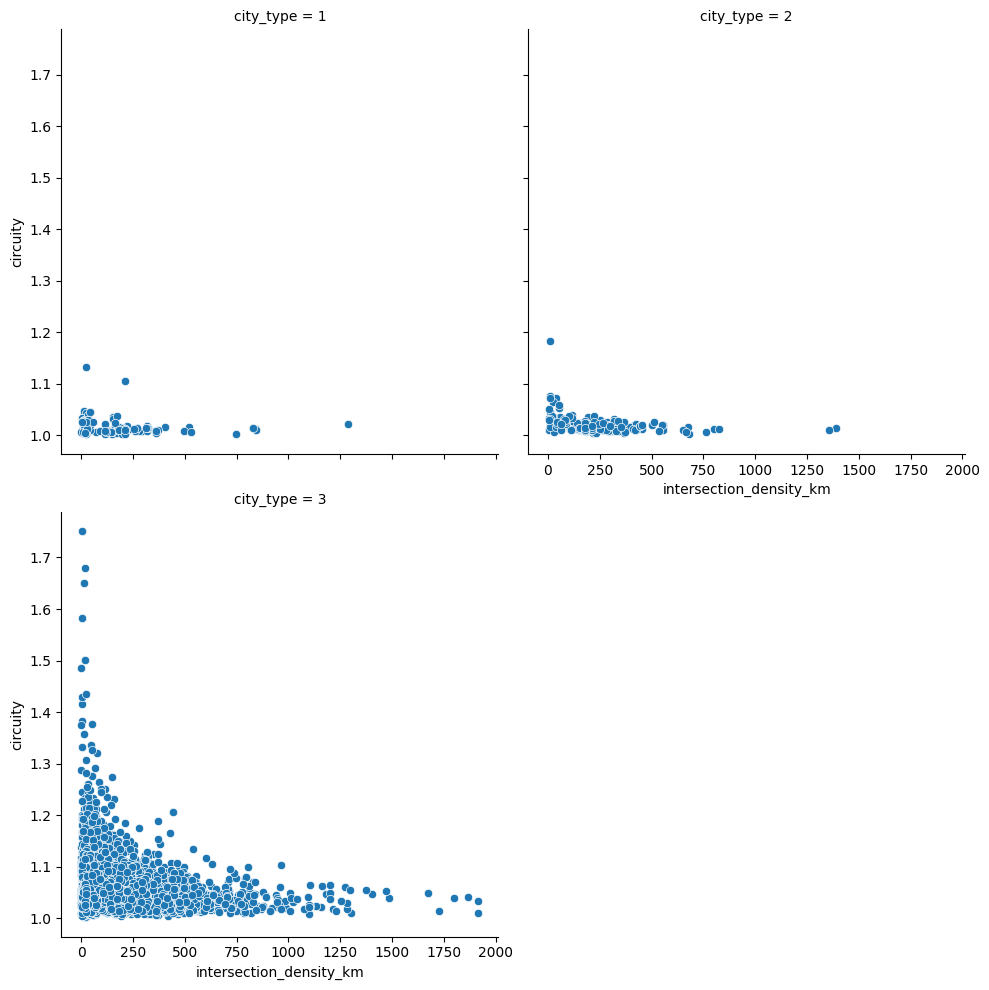

In [94]:
sns.relplot(data=final_df[final_df['intersection_density_km'] < 2000], x='intersection_density_km', y='circuity', col='city_type', col_wrap=2)

<AxesSubplot: xlabel='k_avg', ylabel='Count'>

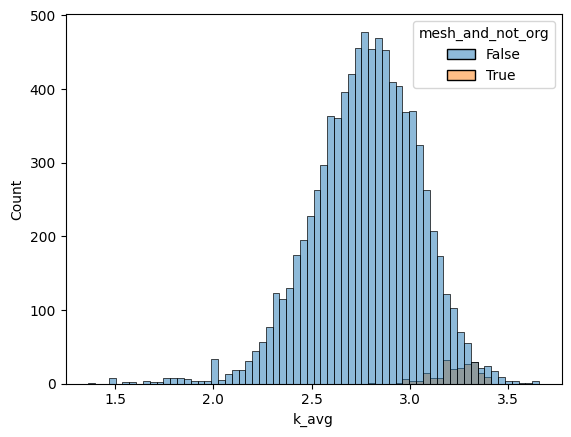

In [95]:
sns.histplot(final_df, x='k_avg', hue='mesh_and_not_org')

<AxesSubplot: xlabel='k_avg', ylabel='Count'>

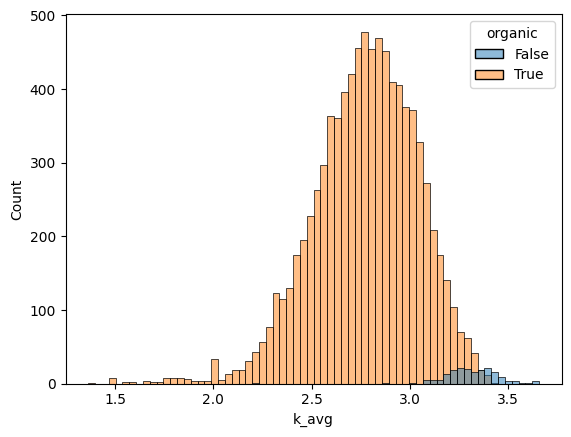

In [96]:
sns.histplot(final_df, x='k_avg', hue='organic')

<AxesSubplot: xlabel='circuity', ylabel='Count'>

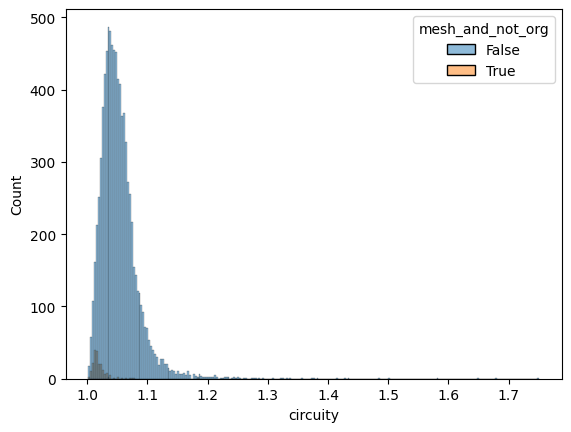

In [97]:
sns.histplot(final_df, x='circuity', hue='mesh_and_not_org')

<AxesSubplot: xlabel='circuity', ylabel='Count'>

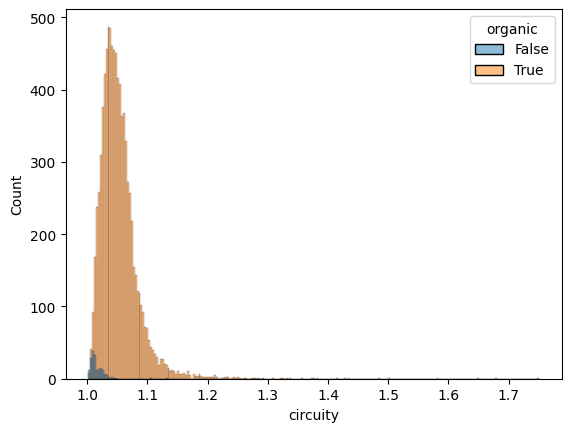

In [98]:
sns.histplot(final_df, x='circuity', hue='organic')

In [99]:
target_cols = ['streets_per_node_avg', 'node_density_km', 'intersection_density_km',
               'prop_deadend', 'nodes_per_km_street', 'meshedness_coefficient']

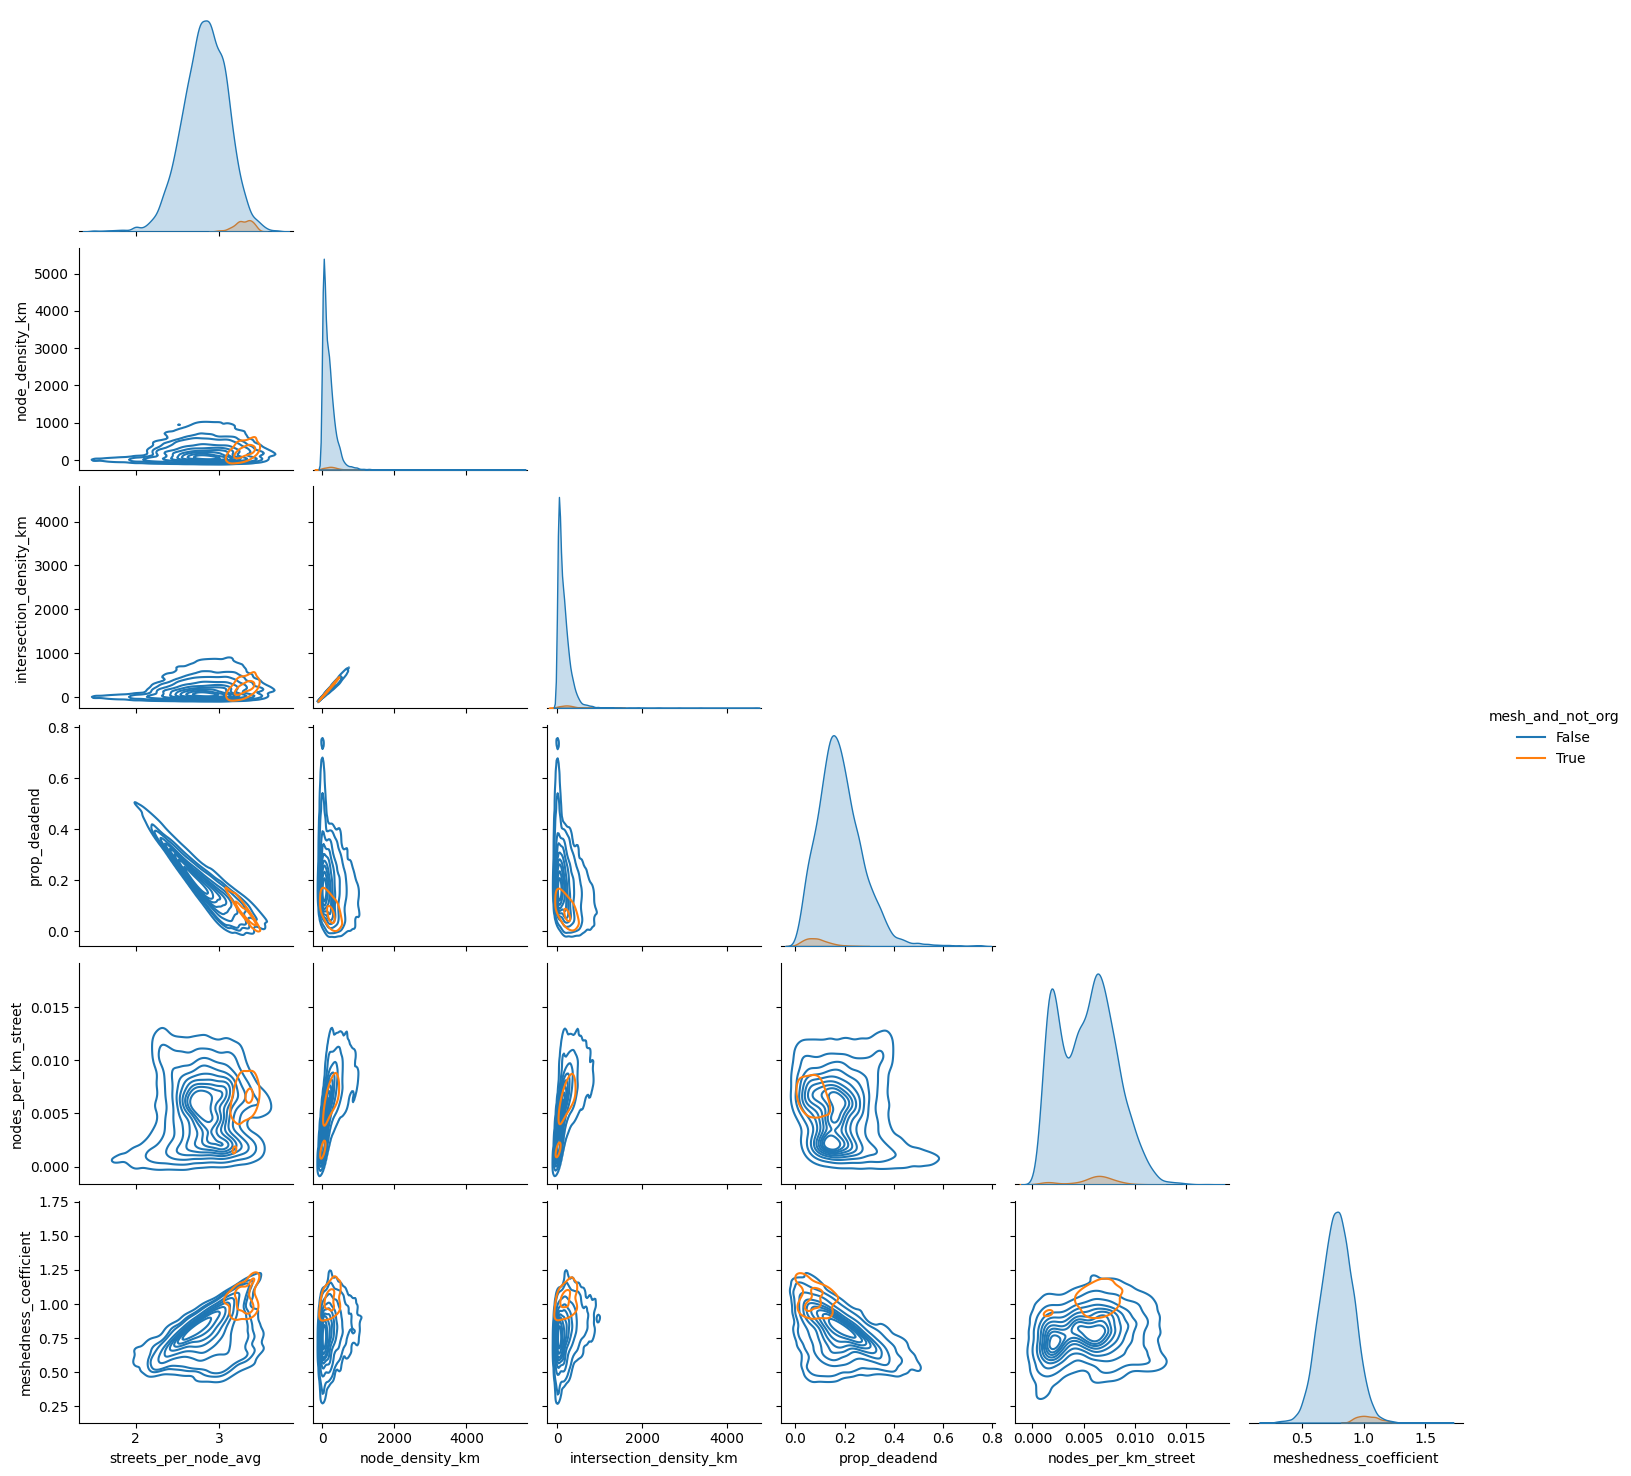

In [100]:
sns.pairplot(final_df[target_cols + ['mesh_and_not_org']], corner=True, kind='kde', hue='mesh_and_not_org', hue_order = [False, True])

C:\Users\danielcampos\Documents\GitHub\POC1\venv\lib\site-packages\seaborn\distributions.py:1185: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


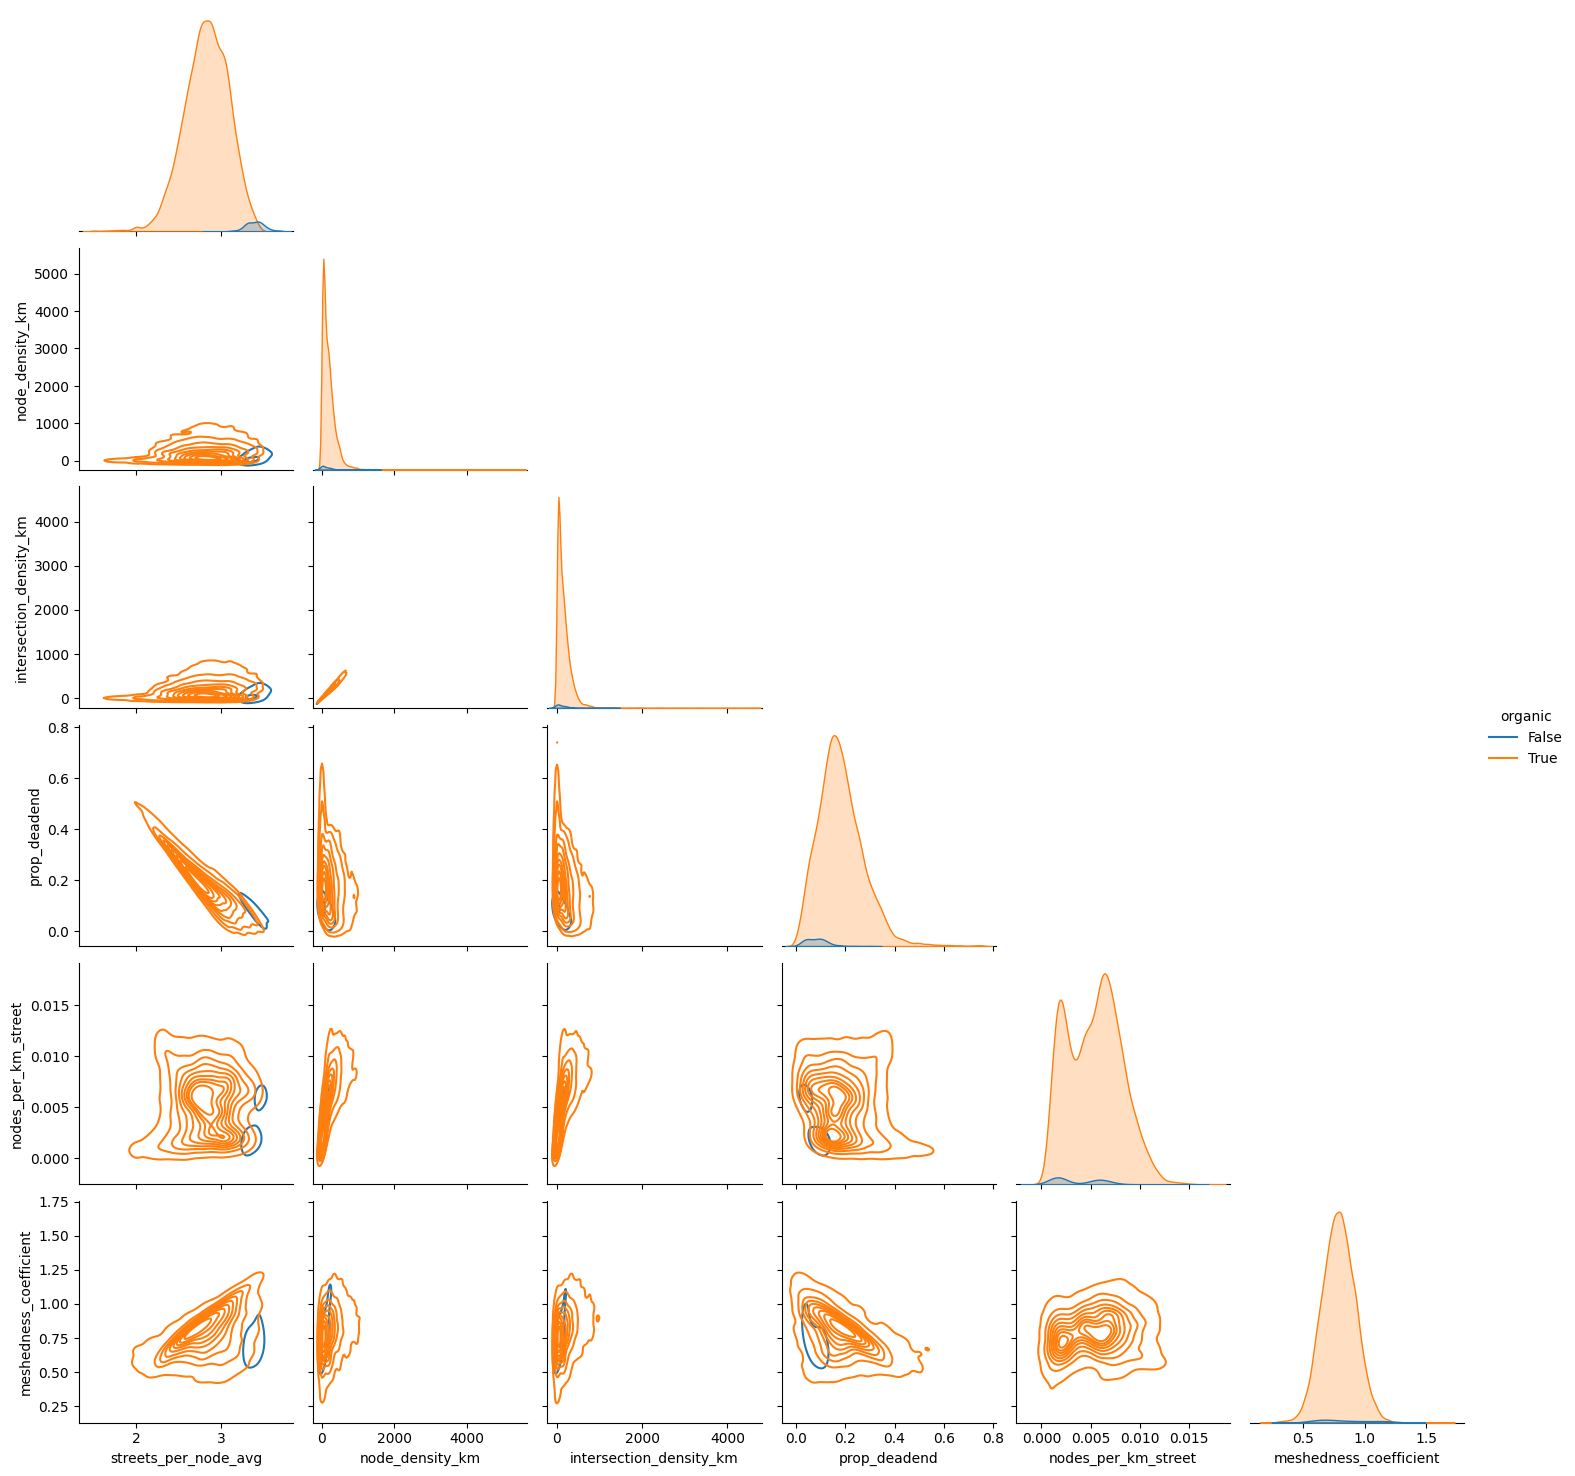

In [101]:
sns.pairplot(final_df[target_cols + ['organic']], corner=True, kind='kde', hue='organic', hue_order = [False, True])

Algumas observações:
- **streets_per_node_avg**: Já era de se esperar que as cidades que não são consideradas orgânicas tenham maior valor para essa *feature*. Entretanto, para todas as outras *features*, ainda existem cidades que são consideradas orgânicas e que possuem valor alto de **streets_per_node_avg**. Outra coisa interessante é que ao combinar essa *feature* com *nodes_per_km_street*, geramos dois grupos separados dentre as cidades não orgânicas.

## Correlação de Variáveis todas as regiões

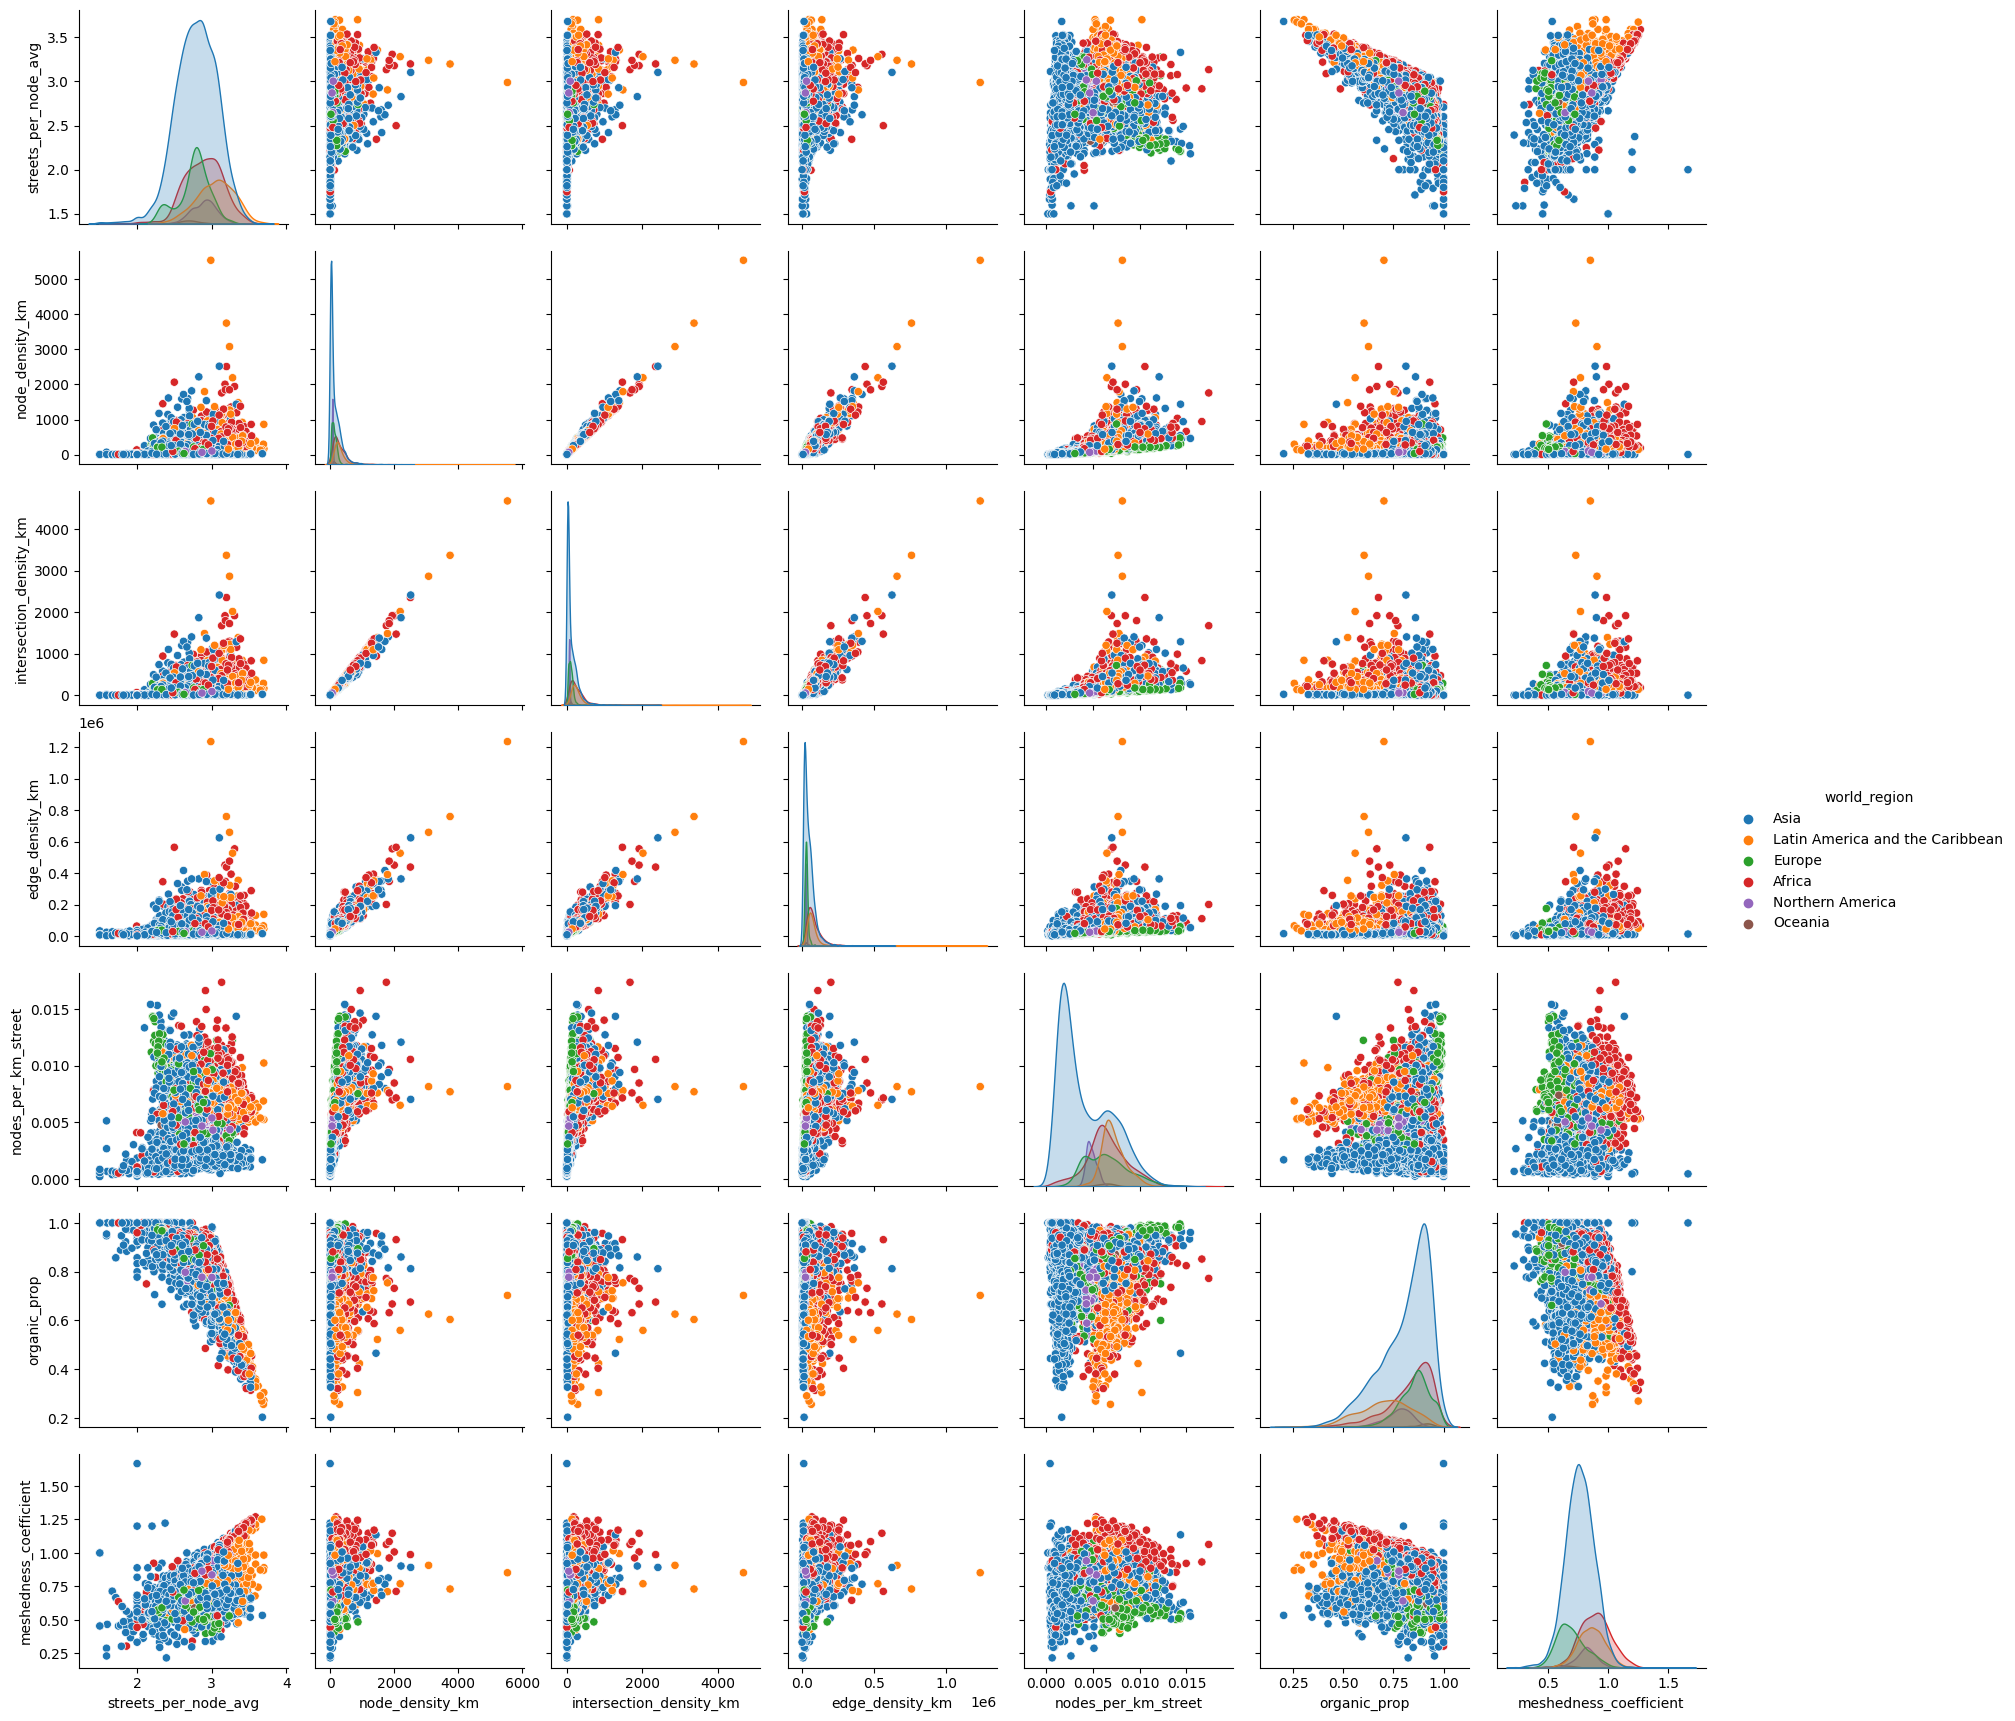

In [57]:
new_target_cols = [
    'streets_per_node_avg', 'node_density_km', 'intersection_density_km', 'edge_density_km',
    'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'world_region'
]
sns.pairplot(final_df[new_target_cols], hue='world_region')

### Análise por região

## *organic_prop* por região

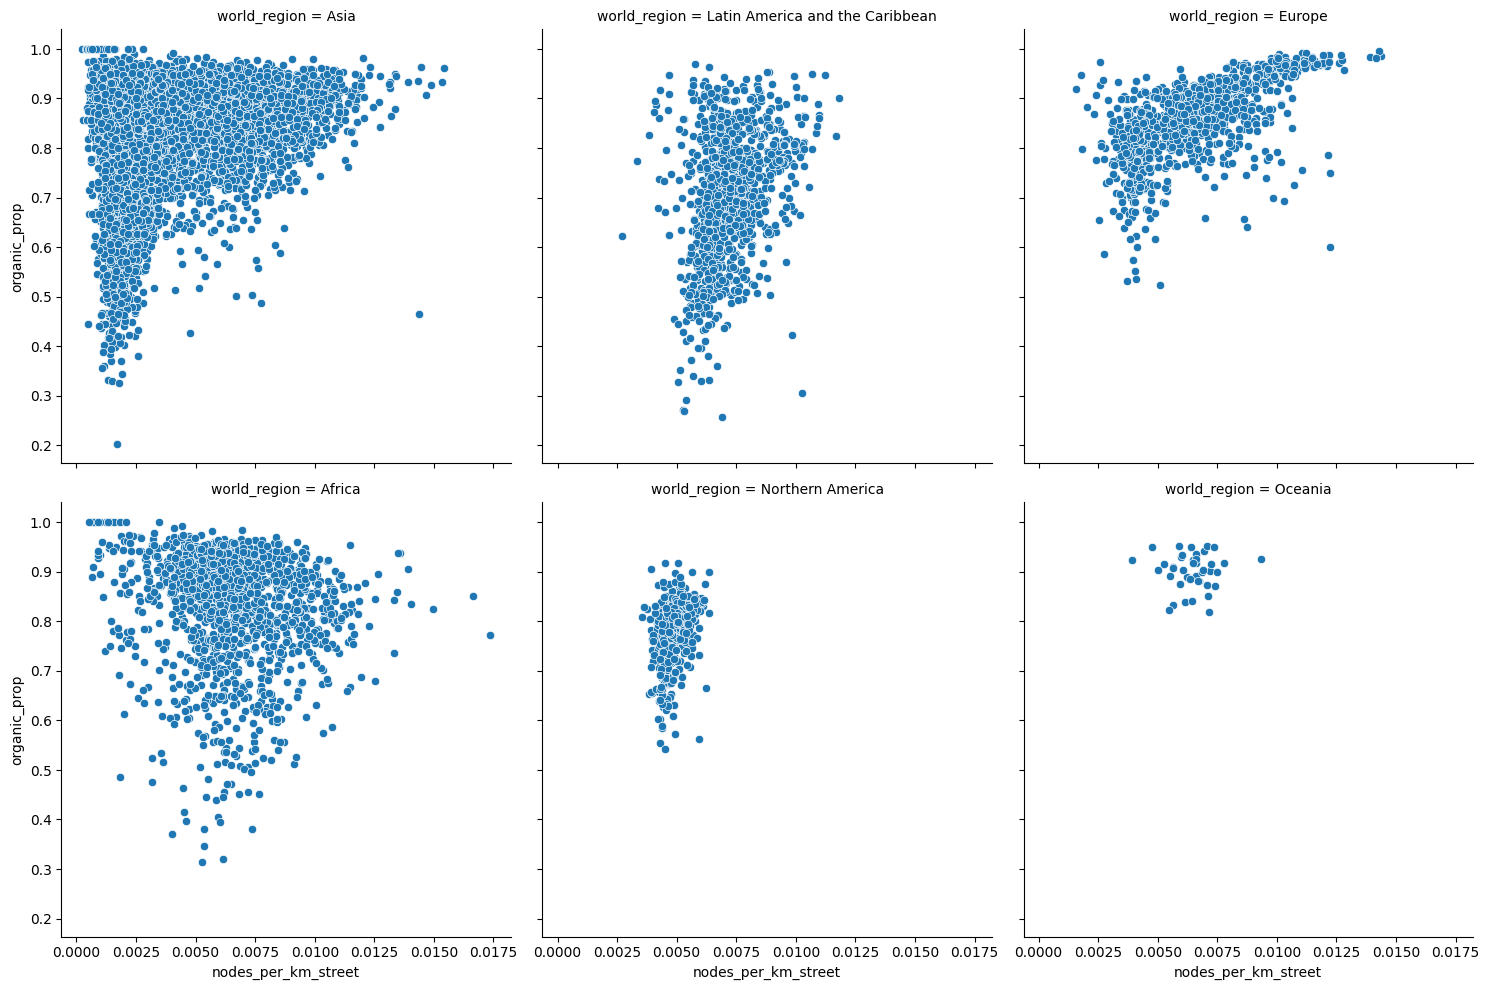

In [142]:
sns.relplot(data=final_df, x='nodes_per_km_street', y='organic_prop', col='world_region', col_wrap=3)

Com esse plot é possível ver que os "dois grupos" que aparentavam existir é devido a grande quantidade de cidades asiáticas com baixa proporção de nós por km em comparação com as outras regiões.

# Variáveis por região

## Ásia

In [76]:
asian_cities = final_df[final_df['world_region'] == "Asia"]

### *organic_prop* na ásia

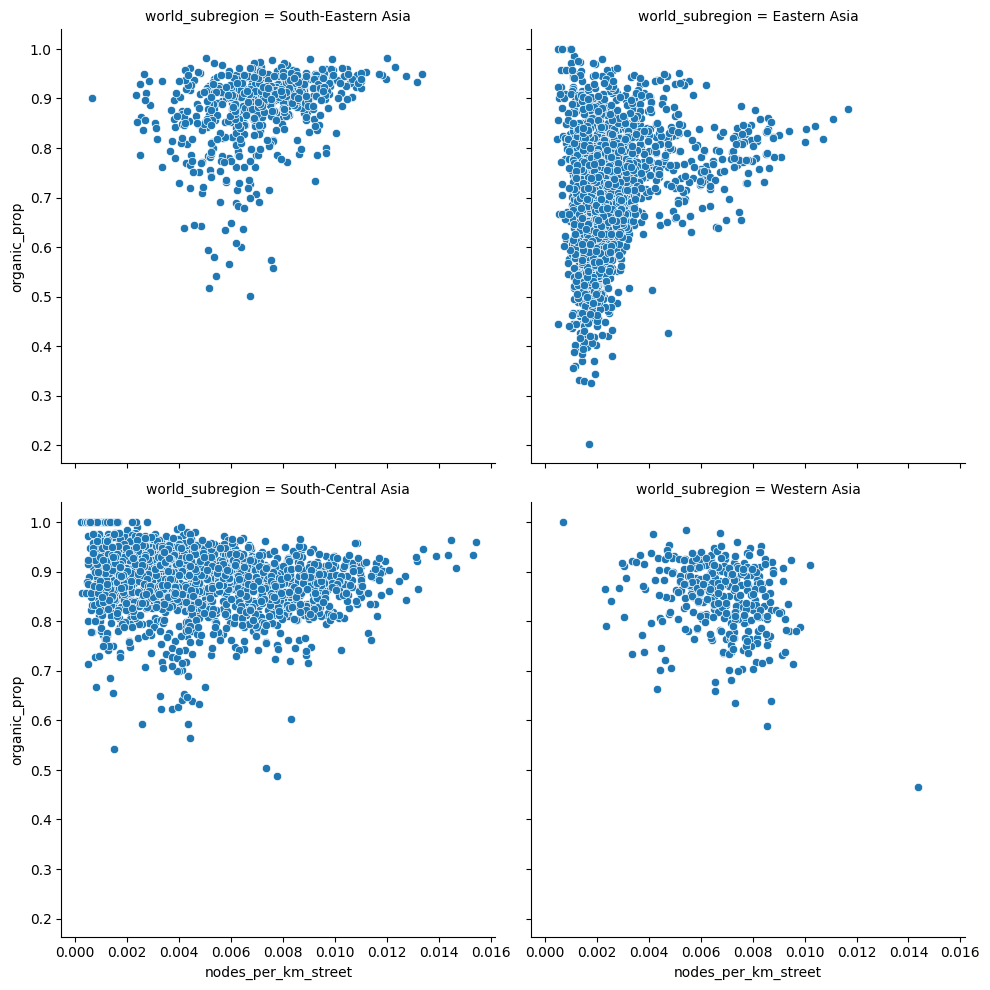

In [78]:
sns.relplot(data=asian_cities, x='nodes_per_km_street', y='organic_prop', col='world_subregion', col_wrap=2)

Para a Ásia, é possível ver cerca de 3 grupos diferentes: Grupo 1: Eastern Asia, Grupo 2: South-Central Asia e Grupo 3: Western Asia com South-Eastern Asia.

As cidades do Grupo 2 e Grupo 3 tem um maior valor de **organic_prop**. As do Grupo 2 tem uma grande variação de *nodes_per_km_street*, enquanto as do Grupo 3 possuem menos variação e tem uma média maior.

Já as cidades de Eastern Asia possuem uma variação de uma ponta a outra do *organic_prop*, mantendo uma baixa proporção de *nodes_per_km_street*.

No geral, pode-se pensar que ter menos nós por km de rua indica quarteirões maiores ou até mesmo cidades em regiões montanhosas que possuem ruas de maior comprimento sem muitas intersecções.

In [101]:
regional_target_cols1 = [
    'circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
    'world_subregion'
]
regional_target_cols2 = [
    'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
    'world_subregion'
]

all_targets = ['circuity', 'k_avg', 'streets_per_node_avg', 'prop_4way', 'prop_3way', 'node_density_km',
               'intersection_density_km', 'edge_density_km', 'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient',
               'straightness', 'prop_3way', 'built_up_area', 'node_count'
              ]

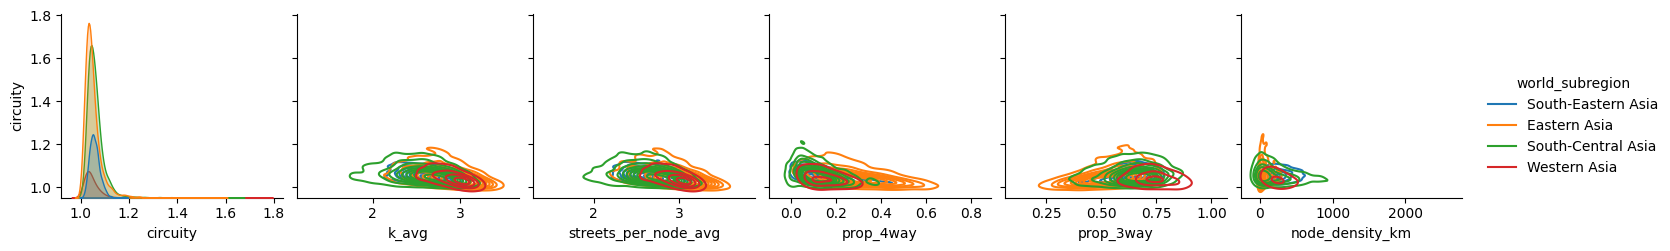

In [95]:
for col in regional_target_cols1[:1]:
    sns.pairplot(asian_cities[regional_target_cols1], hue='world_subregion', kind= 'kde', y_vars = [col])
#     sns.pairplot(asian_cities[regional_target_cols2], hue='world_subregion', kind= 'kde', y_vars = [col])

<AxesSubplot: xlabel='pagerank_max', ylabel='circuity'>

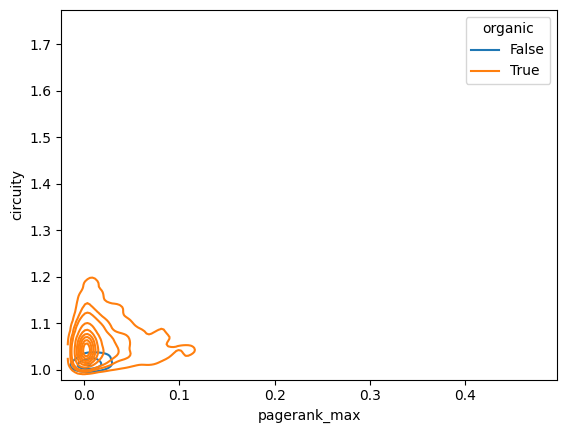

In [166]:
sns.kdeplot(final_df, x='pagerank_max', y='circuity', hue='organic')

In [190]:
final_df.columns

Index(['country', 'country_iso', 'core_city', 'uc_id', 'cc_avg_dir',
       'cc_avg_undir', 'cc_wt_avg_dir', 'cc_wt_avg_undir', 'circuity',
       'elev_iqr', 'elev_mean', 'elev_median', 'elev_range', 'elev_std',
       'grade_mean', 'grade_median', 'intersect_count',
       'intersect_count_clean', 'intersect_count_clean_topo', 'k_avg',
       'length_mean', 'length_median', 'length_total', 'street_segment_count',
       'node_count', 'orientation_entropy', 'orientation_order',
       'pagerank_max', 'prop_4way', 'prop_3way', 'prop_deadend',
       'self_loop_proportion', 'straightness', 'uc_names', 'world_region',
       'world_subregion', 'resident_pop', 'area', 'built_up_area', 'city_name',
       'streets_per_node_avg', 'node_density_km', 'intersection_density_km',
       'edge_density_km', 'street_density_km', '2way_int_prop',
       'nodes_per_km_street', 'organic_prop', 'meshedness_coefficient', 'big',
       'organic'],
      dtype='object')

<AxesSubplot: xlabel='resident_pop', ylabel='built_up_area'>

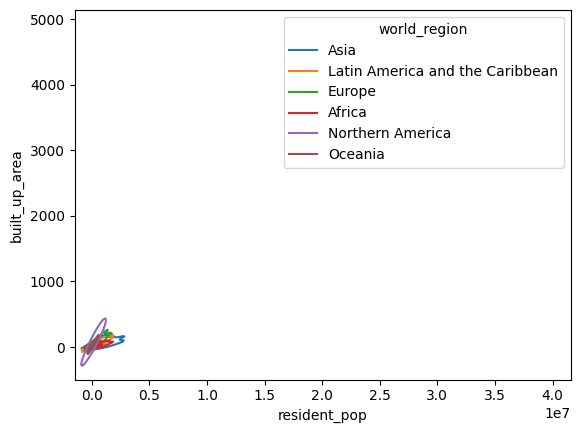

In [192]:
sns.kdeplot(final_df, x='resident_pop', y='built_up_area', hue='world_region')

Text(0.5, 0.98, 'intersect_count vs resident_pop for every region and subregion')

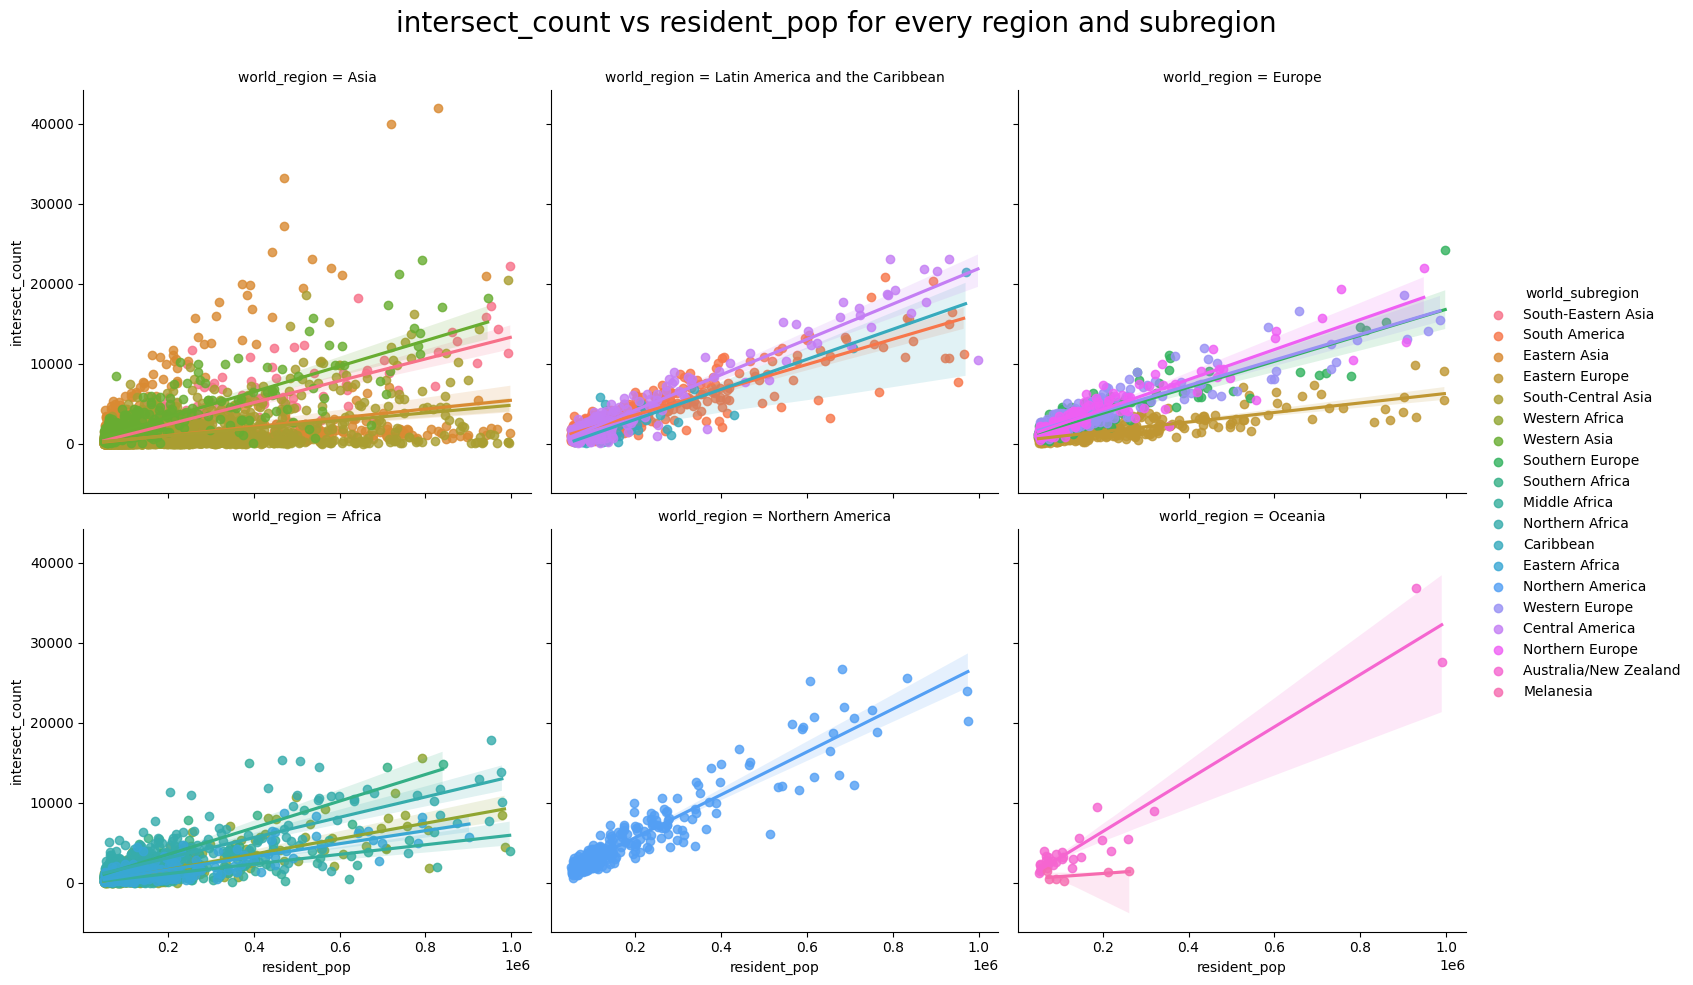

In [210]:
g = sns.lmplot(final_df[final_df['resident_pop'] < 1_000_000], x='resident_pop', y='intersect_count', 
            col='world_region', col_wrap=3, hue='world_subregion')
g.figure.subplots_adjust(top=0.9)
g.figure.suptitle("intersect_count vs resident_pop for every region and subregion", fontsize=20)